Imports

In [646]:
# general imports
import os
from typing import List
from statistics import median, mean
from pathlib import Path
import skimage 
import math

# libraries
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
import SimpleITK as sitk
from tqdm import tqdm


In [496]:
# global variables
image_name = "image.nii.gz"
segmentation_name = "segmentation.nii.gz"

General functions

In [487]:
# Function to calculate mean and median voxel dimensions
def calc_vx_dim(dims):
    mean_dim = {k: mean(dims[k]) for k in dims.keys()}
    median_dim = {k: median(dims[k]) for k in dims.keys()}
    return mean_dim, median_dim

# Spacing information
def spacing_info(path: List[str]):
    vx_dim = {'voxelx': [], 'voxely': [], 'voxelz': []}
    
    for file in path:
        image_file = nib.load(file)
        sx, sy, sz = image_file.header.get_zooms()
        vx_dim['voxelx'].append(sx)
        vx_dim['voxely'].append(sy)
        vx_dim['voxelz'].append(sz)
    
    mean_vx, median_vx = calc_vx_dim(vx_dim)
    
    # Convert the mean and median values to lists of floats
    mean_list = [float(mean_vx['voxelx']), float(mean_vx['voxely']), float(mean_vx['voxelz'])]
    median_list = [float(median_vx['voxelx']), float(median_vx['voxely']), float(median_vx['voxelz'])]
    return mean_list, median_list

In [488]:
# Get image paths
def img_path(type=None):
    # Define the base data path
    data_path = os.sep.join(["..","WORCDatabase","Lipo","worc"])
    
    # Get the list of directory names
    directory_names = os.listdir(data_path)
 
    if type == "img":
        # If type is Image, append image_name to directory names
        images = [data_path + "/" + f + image_name for f in directory_names]
    elif type == "seg":
        # If type is Seg, append segmentation_name to directory names
        images = [data_path + "/" + f + segmentation_name for f in directory_names]
    else:
        # Default case: return the directories
        images = [data_path + "/" + f for f in directory_names]
    
    return images

In [490]:
# Resample, normalice and save new img
def load_image(file_path):
    image = sitk.ReadImage(file_path)
    return image

def resample_image(image, new_spacing):

    original_spacing = np.array(image.GetSpacing())
    original_size = np.array(image.GetSize())

    new_size = original_size * (original_spacing / new_spacing)
    new_size = np.ceil(new_size).astype(int)
    interpolator = sitk.sitkLinear
    resampler = sitk.ResampleImageFilter()
    resampler.SetSize(new_size.tolist())
    resampler.SetOutputSpacing(new_spacing)
    resampler.SetOutputOrigin(image.GetOrigin())
    resampler.SetOutputDirection(image.GetDirection())
    resampler.SetInterpolator(interpolator)

    resampled_image = resampler.Execute(image)
    return resampled_image

def normalize_image(image):
    # Get image array
    image_array = sitk.GetArrayFromImage(image)

    # Normalize to [0, 1]
    normalized_image_array = (image_array - np.min(image_array)) / (np.max(image_array) - np.min(image_array))

    # Create a new SimpleITK image with the normalized array
    normalized_image = sitk.GetImageFromArray(normalized_image_array)
    normalized_image.CopyInformation(image)  # Copy metadata

    return normalized_image

def save_image(images, seg, file_id, path):
    # Create the new directory name based on the value
    new_dir_name = f"Lipo-{file_id:03}"
    # Define the new directory path
    new_dir = Path(path) / new_dir_name
    # Create the new directory if it doesn't exist
    new_dir.mkdir(parents=True, exist_ok=True)
    # Define the file paths for the images and segmentation
    temp_img_path = Path(new_dir) / "image.nii.gz"
    temp_seg_path = new_dir / "segmentation.nii.gz"
    # Write the images and segmentation to the file paths
    sitk.WriteImage(images, temp_img_path)
    sitk.WriteImage(seg, temp_seg_path)
    
    return temp_img_path, temp_seg_path

def preprocessing(file_paths, new_path, voxel):
    # Loop through each file path and process images and segmentations
    for count, file in enumerate(file_paths, start=1):

        img_file = file + image_name
        seg_file = file + segmentation_name
        image = load_image(img_file)
        segmentation = load_image(seg_file)
        
        resampled_img = resample_image(image, voxel)
        resampled_seg = resample_image(segmentation, voxel)
        
        norm_image = normalize_image(resampled_img)
        norm_seg = normalize_image(resampled_seg)
        
        # Save the normalized images and segmentations
        img_path, seg_path = save_image(norm_image, norm_seg, count, new_path)
        
        print("---- Start -----")
        print(f"Image No {count} done")
        
    return img_path, seg_path

Preprocessing
1. Resample to median voxel value per dim
2. Normalization using z-scoring

In [491]:
# Get image paths
images = img_path(type="img")
# Get median spacing information
mean, median = spacing_info(images)
# create new folder/temp folder
path = img_path()
new_path = './trial'
# Resampling and normalizing (Is it necessary to save the imgs?)
#preprocessing(path, new_path, median)
img_path, seg_path = preprocessing(path, new_path, median)

---- Start -----
Image No 1 done
---- Start -----
Image No 2 done
---- Start -----
Image No 3 done
---- Start -----
Image No 4 done
---- Start -----
Image No 5 done
---- Start -----
Image No 6 done
---- Start -----
Image No 7 done
---- Start -----
Image No 8 done
---- Start -----
Image No 9 done
---- Start -----
Image No 10 done
---- Start -----
Image No 11 done
---- Start -----
Image No 12 done
---- Start -----
Image No 13 done
---- Start -----
Image No 14 done
---- Start -----
Image No 15 done
---- Start -----
Image No 16 done
---- Start -----
Image No 17 done
---- Start -----
Image No 18 done
---- Start -----
Image No 19 done
---- Start -----
Image No 20 done
---- Start -----
Image No 21 done
---- Start -----
Image No 22 done
---- Start -----
Image No 23 done
---- Start -----
Image No 24 done
---- Start -----
Image No 25 done
---- Start -----
Image No 26 done
---- Start -----
Image No 27 done
---- Start -----
Image No 28 done
---- Start -----
Image No 29 done
---- Start -----
Image 

75% Quartile cropping and padding (if applicable)
* Padding will be done to all dimension sizes below 30 

In [647]:
def get_image_dimensions(data_path):
    # Get the list of image file paths
    image_name = "image.nii.gz"
    image_paths = [os.path.join(data_path, f, image_name) for f in os.listdir(data_path)]
    # Initialize lists to store sizes
    x_sizes, y_sizes, z_sizes = [], [], []

    # Retrieve the x, y, z sizes for each image
    for img_path in image_paths:
        image = nib.load(img_path)
        sx, sy, sz = image.header.get_data_shape()[:3]
        x_sizes.append(sx)
        y_sizes.append(sy)
        z_sizes.append(sz)

    # Compute the 75% quartile for each dimension
    x_75 = np.percentile(x_sizes, 75)
    y_75 = np.percentile(y_sizes, 75)
    z_75 = np.percentile(z_sizes, 75)

    # Compute the median for each dimension
    x_median = np.median(x_sizes)
    y_median = np.median(y_sizes)
    z_median = np.median(z_sizes)

    return (x_75, y_75, z_75), (x_median, y_median, z_median)

# Example
data_path = "./trial"  # Replace with your actual directory path
(x_75, y_75, z_75), (x_median, y_median, z_median) = get_image_dimensions(data_path)
print(f"75% quartile sizes - X: {x_75}, Y: {y_75}, Z: {z_75}")
print(f"Median sizes - X: {x_median}, Y: {y_median}, Z: {z_median}")

75% quartile sizes - X: 533.0, Y: 542.5, Z: 44.5
Median sizes - X: 448.0, Y: 448.0, Z: 33.0


In [648]:
# Get all z values that goes below 30
# Path for image and segmentation
path_img = './trial/'
img_files = os.listdir(path_img)

image_name = "/image.nii.gz"
seg_name = "/segmentation.nii.gz"

img_IDs = [i[5:13] for i in img_files]
fname_list = os.listdir(path_img)

threshold = list() 
threshold_ids = list()

(x_75, y_75, z_75), (x_median, y_median, z_median) = get_image_dimensions(path_img)
print(x_75, y_75, z_75)

for mask_file in tqdm(fname_list):
    print(mask_file[5:13])
    # match the mask file to the original image
    if mask_file[5:13] in img_IDs:
        index = img_IDs.index(mask_file[5:13])
        seg = nib.load(path_img + '/' + mask_file + seg_name) # load segmentation
        
        seg_data = seg.get_fdata()
        sx, sy, sz = seg_data.shape
        if (sx > x_75) or (sy > y_75) or (sz > z_75) or (sx < 30) or (sy < 30) or (sz < 30):
            print(sx, sy, sz)
            threshold.append(path_img + '/' + mask_file + seg_name)
            threshold_ids.append(mask_file)


533.0 542.5 44.5


  0%|          | 0/115 [00:00<?, ?it/s]

001
252 221 46
002


  2%|▏         | 2/115 [00:00<00:20,  5.59it/s]

533 533 57
003


  4%|▍         | 5/115 [00:00<00:16,  6.69it/s]

589 589 49
004
420 420 22
005
006


  7%|▋         | 8/115 [00:01<00:10,  9.91it/s]

532 366 29
007
008
009


  9%|▊         | 10/115 [00:01<00:11,  8.84it/s]

010
364 296 65
011


 10%|█         | 12/115 [00:01<00:09, 10.31it/s]

350 350 23
012
322 227 45
013
322 322 48
014


 12%|█▏        | 14/115 [00:01<00:10,  9.46it/s]

518 518 27
015
504 504 28
016


 14%|█▍        | 16/115 [00:02<00:16,  6.11it/s]

630 630 57
017


 15%|█▍        | 17/115 [00:02<00:16,  5.80it/s]

018
210 210 17
019
290 322 27
020


 17%|█▋        | 20/115 [00:02<00:12,  7.91it/s]

021


 18%|█▊        | 21/115 [00:02<00:13,  6.82it/s]

616 616 35
022


 21%|██        | 24/115 [00:03<00:12,  7.14it/s]

528 528 64
023
154 154 28
024
025
309 309 25
026
266 266 26
027


 23%|██▎       | 27/115 [00:03<00:10,  8.04it/s]

448 448 58
028
029


 27%|██▋       | 31/115 [00:04<00:09,  8.47it/s]

030
031
560 560 24
032
224 224 26
033


 29%|██▊       | 33/115 [00:04<00:11,  7.28it/s]

593 593 49
034
659 659 20


 30%|██▉       | 34/115 [00:04<00:11,  6.81it/s]

035
448 448 18
036


 33%|███▎      | 38/115 [00:05<00:08,  9.02it/s]

525 525 29
037
308 216 11
038
490 490 20
039
040


 35%|███▍      | 40/115 [00:05<00:08,  9.36it/s]

490 475 29
041
383 392 21
042


 37%|███▋      | 42/115 [00:05<00:10,  6.86it/s]

588 588 60
043
717 717 9
044


 39%|███▉      | 45/115 [00:06<00:11,  6.30it/s]

504 504 55
045
046


 40%|████      | 46/115 [00:06<00:11,  6.10it/s]

503 574 32
047
280 280 28
048


 42%|████▏     | 48/115 [00:06<00:11,  5.75it/s]

561 561 58
049


 43%|████▎     | 49/115 [00:07<00:17,  3.67it/s]

728 728 66
050
051


 44%|████▍     | 51/115 [00:08<00:17,  3.64it/s]

602 602 70
052


 45%|████▌     | 52/115 [00:08<00:16,  3.80it/s]

588 588 32
053
054


 49%|████▊     | 56/115 [00:08<00:10,  5.82it/s]

532 532 62
055
280 280 22
056
057


 50%|████▉     | 57/115 [00:08<00:09,  5.95it/s]

588 441 32
058


 51%|█████▏    | 59/115 [00:09<00:09,  5.99it/s]

448 448 65
059
337 337 49
060


 52%|█████▏    | 60/115 [00:09<00:08,  6.33it/s]

061
238 238 28
062
225 225 17
063


 56%|█████▌    | 64/115 [00:09<00:06,  7.39it/s]

616 616 37
064
065
294 294 16
066


 58%|█████▊    | 67/115 [00:10<00:05,  9.50it/s]

067
068


 60%|██████    | 69/115 [00:10<00:05,  8.68it/s]

350 280 54
069
070


 61%|██████    | 70/115 [00:10<00:08,  5.31it/s]

686 686 50
071
280 280 21
072
420 420 50


 63%|██████▎   | 73/115 [00:11<00:06,  6.66it/s]

073
478 478 26
074


 65%|██████▌   | 75/115 [00:11<00:06,  6.11it/s]

448 448 69
075
521 521 20
076
210 210 25
077


 67%|██████▋   | 77/115 [00:11<00:04,  8.15it/s]

490 490 22
078


 68%|██████▊   | 78/115 [00:11<00:06,  6.02it/s]

588 588 48
079


 69%|██████▊   | 79/115 [00:12<00:06,  5.48it/s]

602 602 33
080


 70%|██████▉   | 80/115 [00:12<00:06,  5.09it/s]

561 561 33
081
168 168 21
082


 71%|███████▏  | 82/115 [00:12<00:05,  5.85it/s]

560 560 33
083


 72%|███████▏  | 83/115 [00:12<00:06,  5.00it/s]

491 491 59
084
085


 75%|███████▍  | 86/115 [00:13<00:05,  5.42it/s]

561 561 45
086
552 552 30


 76%|███████▌  | 87/115 [00:13<00:04,  5.79it/s]

087
515 588 23
088


 77%|███████▋  | 89/115 [00:13<00:03,  6.71it/s]

089
490 490 24
090
091


 81%|████████  | 93/115 [00:14<00:02,  8.65it/s]

092
280 280 27
093
094


 83%|████████▎ | 95/115 [00:14<00:03,  5.66it/s]

617 617 56
095
519 519 26
096


 85%|████████▌ | 98/115 [00:15<00:02,  7.03it/s]

617 617 33
097
168 119 27
098
099


 87%|████████▋ | 100/115 [00:15<00:02,  6.60it/s]

490 490 50
100
504 504 21
101


 88%|████████▊ | 101/115 [00:15<00:02,  6.94it/s]

532 532 21
102


 90%|████████▉ | 103/115 [00:16<00:01,  6.26it/s]

560 560 32
103
617 617 20
104


 90%|█████████ | 104/115 [00:16<00:02,  4.92it/s]

532 532 53
105
322 322 28
106


 92%|█████████▏| 106/115 [00:16<00:01,  5.78it/s]

107
238 238 20
108


 94%|█████████▍| 108/115 [00:16<00:01,  5.87it/s]

672 672 37
109


 97%|█████████▋| 111/115 [00:17<00:00,  6.74it/s]

616 616 36
110
448 448 21
111
350 350 29
112


 98%|█████████▊| 113/115 [00:17<00:00,  8.05it/s]

113
447 560 22
114
210 210 21
115


100%|██████████| 115/115 [00:17<00:00,  6.52it/s]

280 280 55


In [649]:
# Check which are the threshold ids
print(threshold)
print(len(threshold_ids))

['./trial//Lipo-001/segmentation.nii.gz', './trial//Lipo-002/segmentation.nii.gz', './trial//Lipo-003/segmentation.nii.gz', './trial//Lipo-004/segmentation.nii.gz', './trial//Lipo-006/segmentation.nii.gz', './trial//Lipo-010/segmentation.nii.gz', './trial//Lipo-011/segmentation.nii.gz', './trial//Lipo-012/segmentation.nii.gz', './trial//Lipo-013/segmentation.nii.gz', './trial//Lipo-014/segmentation.nii.gz', './trial//Lipo-015/segmentation.nii.gz', './trial//Lipo-016/segmentation.nii.gz', './trial//Lipo-018/segmentation.nii.gz', './trial//Lipo-019/segmentation.nii.gz', './trial//Lipo-021/segmentation.nii.gz', './trial//Lipo-022/segmentation.nii.gz', './trial//Lipo-023/segmentation.nii.gz', './trial//Lipo-025/segmentation.nii.gz', './trial//Lipo-026/segmentation.nii.gz', './trial//Lipo-027/segmentation.nii.gz', './trial//Lipo-031/segmentation.nii.gz', './trial//Lipo-032/segmentation.nii.gz', './trial//Lipo-033/segmentation.nii.gz', './trial//Lipo-034/segmentation.nii.gz', './trial//Lipo-

Funtions for cropping and padding

In [650]:
def extract_liver(mask, liver):
    """
    get either the liver or tumor region from the mask
    args:
        mask: mask of the liver and tumor
        liver: if True return the liver region, if False return the tumor region
    """
    mask = mask.astype(int)
    
    # Not necessary for tummor segmention for Lipo
    #if liver:
    #    mask[mask == 2] = 1
    #else:
    #    mask[mask == 1] = 0
    #    mask[mask == 2] = 1
    #    mask = mask.astype(int)
        
    labeled = skimage.measure.label(mask, connectivity=2)

    labeled[labeled != 1] = 0
    mask = labeled
    if np.count_nonzero(mask) == 0:
        print('[WARNING]: no liver found')
        return None
    return mask

In [651]:
# Check dimensions 
path_img = './trial/'
max_bbox_size, (medx, medy, medz) = get_image_dimensions(path_img)
print(max_bbox_size)
(medx, medy, medz)

(533.0, 542.5, 44.5)


(448.0, 448.0, 33.0)

In [652]:
def get_center_of_mass_3D(binary_image):
    # Label the connected components in the binary image
    labeled_image = skimage.measure.label(binary_image)
    
    # Compute region properties including center of mass
    props = skimage.measure.regionprops_table(labeled_image, properties=['centroid'])
    print(props)
    
    # Get the center of mass coordinates
    center_row = np.mean(props['centroid-0'])
    center_col = np.mean(props['centroid-1'])
    center_slice = np.mean(props['centroid-2'])
    
    # Return the center of mass coordinates as a tuple
    center_of_mass = (center_row, center_col, center_slice)
    return center_of_mass

In [653]:
def tumor_bbox(tumor_mask, max_bbox_size, bbox_size = [50, 50, 50]):
    '''
    find the center of mass of the tumor and return the bounding box
    args:
        tumor_mask: binary mask of the tumor
    returns:
        bbox: bounding box of the tumor (min_row, min_col, min_slice, max_row, max_col, max_slice = bbox)
    '''
    # find the center of mass of the tumor
    com = get_center_of_mass_3D(tumor_mask)
    com = np.array(com).astype(int)

    # get bbox
    image_probs = skimage.measure.regionprops((tumor_mask))
    for props in image_probs:
        bbox = props.bbox
        min_row, min_col, min_slice, max_row, max_col, max_slice = bbox 

    print("Median bbox size before change: ", bbox_size)
    print("Max size of a bbox should be: ", max_bbox_size)

    # Update bbox_size[0] based on comparison with bbox_size[0]
    bbox_size[0] = bbox_size[0] if (max_row - min_row) < bbox_size[0] else max_bbox_size[0]
    # Update bbox_size[1] based on comparison with bbox_size[1]
    bbox_size[1] = bbox_size[1] if (max_col - min_col) < bbox_size[1] else max_bbox_size[1]
    # Update bbox_size[2] based on comparison with bbox_size[2]
    bbox_size[2] = bbox_size[2] if (max_slice - min_slice) < bbox_size[2] else max_bbox_size[2]

    print("bbox: ", bbox_size)

    # extract bbox around the center of mass
    min_row = int(max(0, com[0] - bbox_size[0] // 2))
    max_row = int(com[0] + bbox_size[0]//2)
    min_col = int(max(0, com[1] - bbox_size[1] // 2))
    max_col = int(com[1] + bbox_size[1]//2)
    min_slice = int(max(0, com[2] - bbox_size[2] // 2))
    max_slice = int(com[2] + bbox_size[2]//2)
    
    return min_row, min_col, min_slice, max_row, max_col, max_slice

In [654]:
def crop_scan(scan, bbox):
    '''
    Function to crop the scan to the bounding box of the liver
    args:
        scan: original scan (3D) as numpy array
        bbox: bounding box of the liver (min_row, min_col, min_slice, max_row, max_col, max_slice = bbox)
        margin_frac: fraction of the image side to add to the bounding box

    returns:
        scan_crop: cropped scan
    '''
    min_row, min_col, min_slice, max_row, max_col, max_slice = bbox

    # Crop the scan using the updated bounding box
    scan_crop = scan[min_row:max_row, min_col:max_col, min_slice:max_slice]
    # scan_crop = scan[min_row:max_row, min_col:max_col, :]
    print("Scan crop shape: ", scan_crop.shape)
    return scan_crop

In [655]:
def pad_3d_image(image):
    """
    Pad a 3D image to the target shape while preserving the content.
    
    Args:
    - image: 3D numpy array representing the image.
    - target_shape: Tuple specifying the target shape (depth, height, width) of the padded image.
    
    Returns:
    - Padded 3D numpy array.
    """
    # Get the current shape of the image
    current_shape = image.shape
    target_shape = tuple(max(dim, 30) for dim in current_shape)
    
    img_data = image.get_fdata().astype(np.float32)
    print("current img shape", current_shape)
    print("target img shape", target_shape)
    # Calculate the padding amounts for each dimension
    pad_depth = math.ceil((target_shape[0] - current_shape[0]) / 2)
    pad_height = math.ceil((target_shape[1] - current_shape[1]) / 2)
    pad_width = math.ceil((target_shape[2] - current_shape[2]) / 2)
    
    
    print(f"pad depth: {pad_depth}, pad height: {pad_height}, pad width: {pad_width} ") 
    
    print("Calculating if correct size of image is done to: ", target_shape)
    print(f"size x total: {current_shape[0] + pad_depth * 2}, size y total: {current_shape[1] + pad_height * 2 }, size z total: {current_shape[2] + pad_width * 2} ") 

    final_shape = [current_shape[0] + pad_depth * 2, current_shape[1] + pad_height * 2 , current_shape[2] + pad_width * 2]
    print("Final shape: ", final_shape)
    
    pad_depth_conditioned = pad_depth - 1 if final_shape[0] > target_shape[0] else pad_depth
    pad_height_conditioned = pad_height - 1 if final_shape[1] > target_shape[1] else pad_height
    pad_width_conditioned = pad_width - 1 if final_shape[2] > target_shape[2] else pad_width

    # Pad the image using np.pad
    padded_image = np.pad(img_data, ((pad_depth, pad_depth_conditioned), (pad_height, pad_height_conditioned), (pad_width_conditioned, pad_width)), mode='constant')
    
    return padded_image

In [656]:
# Processing pipeline over all images above the 75% quartile
min_row_list, min_col_list, min_slice_list, max_row_list, max_col_list, max_slice_list = [], [], [], [], [], []
failed_list = []
# Path for image and segmentation
path_img = './trial/'
img_files = os.listdir(path_img)
image_name = "/image.nii.gz"

img_IDs = [i[5:13] for i in img_files]
seg_name = "/segmentation.nii.gz"
fname_list = os.listdir(path_img)

counter = 0

# Get median sizes and below 75% quartile size
max_bbox_size, (medx, medy, medz) = get_image_dimensions(path_img)

for mask_file in tqdm(fname_list):
    print(mask_file[5:13])
    # match the mask file to the original image
    #if mask_file[5:13] in threshold_ids[5:13]:
    if any(mask_file[5:13] == ids[5:13] for ids in threshold_ids):
        index = img_IDs.index(mask_file[5:13])
        img = nib.load(path_img + '/' + mask_file + image_name) # load image
        seg = nib.load(path_img + '/' + mask_file + seg_name) # load segmentation
        
        img_data = img.get_fdata()
        seg_data = seg.get_fdata()

        print("Original image shape: ", img_data.shape)
        # get the header information
        header = img.header 
        affine = img.affine

        # select the tumor region
        mask_data =  extract_liver(seg_data, liver = False)
        if mask_data is None:
            print(f'[WARNING]: roi. {mask_file}')
            failed_list.append(mask_file)
            continue

        #if fixed_size_box:
        bbox = tumor_bbox(mask_data, max_bbox_size, bbox_size = [medx, medy, medz])
        print("new bbox: ", bbox)
        if bbox is None:
            print(f'[WARNING]: bbox is None. {mask_file}')
            failed_list.append(mask_file)
            continue
        min_row, min_col, min_slice, max_row, max_col, max_slice = bbox
        print(f"row min-max: {min_row,max_row}, col min-max: {min_col, max_col}, slice min-max: {min_slice, max_slice} ") # This is not giving the correct value back.
        
        # crop the scan
        scan_crop = crop_scan(img_data, bbox) 
        seg_crop = crop_scan(seg_data, bbox) 
        
        cropped_img = nib.Nifti1Image(scan_crop, img.affine, img.header)
        cropped_seg = nib.Nifti1Image(seg_crop, seg.affine, seg.header)
        
        new_img = cropped_img.get_fdata()
        new_seg = cropped_seg.get_fdata()

        print("New image shape: ", new_img.shape)

        # Check that each dimension is at least 30 in one line
        dims_ok = all(dim >= 30 for dim in new_img.shape)

        if not dims_ok:
            # Adding padding if necessary
            padded_img_data = pad_3d_image(cropped_img)
            padded_seg_data = pad_3d_image(cropped_seg)

            # Create a new nibabel image object with the padded data
            final_img = nib.Nifti1Image(padded_img_data, affine)
            final_seg = nib.Nifti1Image(padded_seg_data, seg.affine, seg.header)
        else: 
            # Create a new nibabel image object with the padded data
            final_img = cropped_img
            final_seg = cropped_seg
 
        temp_img_path = path_img + '/' + mask_file + image_name
        temp_seg_path = path_img + '/' + mask_file + seg_name
        
        # Save the new NIfTI file
        
        print(f"saving to: {temp_img_path}, overriding image: {mask_file}")
        nib.save(final_img, temp_img_path)
        nib.save(final_seg, temp_seg_path)


print(failed_list)

  0%|          | 0/115 [00:00<?, ?it/s]

001
Original image shape:  (252, 221, 46)
{'centroid-0': array([103.63939585]), 'centroid-1': array([120.42953393]), 'centroid-2': array([20.54594084])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 44.5]
new bbox:  (0, 0, 0, 327, 344, 42)
row min-max: (0, 327), col min-max: (0, 344), slice min-max: (0, 42) 
Scan crop shape:  (252, 221, 42)
Scan crop shape:  (252, 221, 42)
New image shape:  (252, 221, 42)
saving to: ./trial//Lipo-001/image.nii.gz, overriding image: Lipo-001


  1%|          | 1/115 [00:00<00:47,  2.38it/s]

002
Original image shape:  (533, 533, 57)
{'centroid-0': array([357.08871559]), 'centroid-1': array([224.73794255]), 'centroid-2': array([30.9541334])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 44.5]
new bbox:  (133, 0, 8, 581, 448, 52)
row min-max: (133, 581), col min-max: (0, 448), slice min-max: (8, 52) 
Scan crop shape:  (400, 448, 44)
Scan crop shape:  (400, 448, 44)
New image shape:  (400, 448, 44)
saving to: ./trial//Lipo-002/image.nii.gz, overriding image: Lipo-002


  2%|▏         | 2/115 [00:02<02:14,  1.19s/it]

003
Original image shape:  (589, 589, 49)
{'centroid-0': array([200.50706433]), 'centroid-1': array([337.96713604]), 'centroid-2': array([20.7083086])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 113, 4, 424, 561, 36)
row min-max: (0, 424), col min-max: (113, 561), slice min-max: (4, 36) 
Scan crop shape:  (424, 448, 32)
Scan crop shape:  (424, 448, 32)
New image shape:  (424, 448, 32)
saving to: ./trial//Lipo-003/image.nii.gz, overriding image: Lipo-003


  3%|▎         | 3/115 [00:04<02:51,  1.53s/it]

004
Original image shape:  (420, 420, 22)
{'centroid-0': array([174.24922961]), 'centroid-1': array([179.16461229]), 'centroid-2': array([11.73622356])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 0, 0, 398, 403, 27)
row min-max: (0, 398), col min-max: (0, 403), slice min-max: (0, 27) 
Scan crop shape:  (398, 403, 22)
Scan crop shape:  (398, 403, 22)
New image shape:  (398, 403, 22)
current img shape (398, 403, 22)
target img shape (398, 403, 30)
pad depth: 0, pad height: 0, pad width: 4 
Calculating if correct size of image is done to:  (398, 403, 30)
size x total: 398, size y total: 403, size z total: 30 
Final shape:  [398, 403, 30]
current img shape (398, 403, 22)
target img shape (398, 403, 30)
pad depth: 0, pad height: 0, pad width: 4 
Calculating if correct size of image is done to:  (398, 403, 30)
size x total: 398, size y total: 403, size z total: 30 
Final shape:  [398, 40

  3%|▎         | 4/115 [00:04<02:14,  1.21s/it]

005
006
Original image shape:  (532, 366, 29)
{'centroid-0': array([159.62149225]), 'centroid-1': array([61.42894753]), 'centroid-2': array([13.57524083])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 0, 0, 383, 285, 29)
row min-max: (0, 383), col min-max: (0, 285), slice min-max: (0, 29) 
Scan crop shape:  (383, 285, 29)
Scan crop shape:  (383, 285, 29)
New image shape:  (383, 285, 29)
current img shape (383, 285, 29)
target img shape (383, 285, 30)
pad depth: 0, pad height: 0, pad width: 1 
Calculating if correct size of image is done to:  (383, 285, 30)
size x total: 383, size y total: 285, size z total: 31 
Final shape:  [383, 285, 31]
current img shape (383, 285, 29)
target img shape (383, 285, 30)
pad depth: 0, pad height: 0, pad width: 1 
Calculating if correct size of image is done to:  (383, 285, 30)
size x total: 383, size y total: 285, size z total: 31 
Final shape:  [383,

  5%|▌         | 6/115 [00:05<01:20,  1.36it/s]

007
008
009
010
Original image shape:  (364, 296, 65)
{'centroid-0': array([141.76564407]), 'centroid-1': array([194.44046346]), 'centroid-2': array([29.03391752])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 44.5]
new bbox:  (0, 0, 7, 365, 418, 51)
row min-max: (0, 365), col min-max: (0, 418), slice min-max: (7, 51) 
Scan crop shape:  (364, 296, 44)
Scan crop shape:  (364, 296, 44)
New image shape:  (364, 296, 44)
saving to: ./trial//Lipo-010/image.nii.gz, overriding image: Lipo-010


  9%|▊         | 10/115 [00:06<00:44,  2.36it/s]

011
Original image shape:  (350, 350, 23)


 10%|▉         | 11/115 [00:06<00:44,  2.34it/s]

{'centroid-0': array([209.95350339]), 'centroid-1': array([233.90765257]), 'centroid-2': array([11.03145902])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 9, 0, 433, 457, 27)
row min-max: (0, 433), col min-max: (9, 457), slice min-max: (0, 27) 
Scan crop shape:  (350, 341, 23)
Scan crop shape:  (350, 341, 23)
New image shape:  (350, 341, 23)
current img shape (350, 341, 23)
target img shape (350, 341, 30)
pad depth: 0, pad height: 0, pad width: 4 
Calculating if correct size of image is done to:  (350, 341, 30)
size x total: 350, size y total: 341, size z total: 31 
Final shape:  [350, 341, 31]
current img shape (350, 341, 23)
target img shape (350, 341, 30)
pad depth: 0, pad height: 0, pad width: 4 
Calculating if correct size of image is done to:  (350, 341, 30)
size x total: 350, size y total: 341, size z total: 31 
Final shape:  [350, 341, 31]
saving to: ./trial//Lipo-011/image.

 10%|█         | 12/115 [00:07<00:46,  2.23it/s]

013
Original image shape:  (322, 322, 48)
{'centroid-0': array([144.28300848]), 'centroid-1': array([93.51535616]), 'centroid-2': array([21.45574973])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 0, 5, 368, 317, 37)
row min-max: (0, 368), col min-max: (0, 317), slice min-max: (5, 37) 
Scan crop shape:  (322, 317, 32)
Scan crop shape:  (322, 317, 32)
New image shape:  (322, 317, 32)
saving to: ./trial//Lipo-013/image.nii.gz, overriding image: Lipo-013


 11%|█▏        | 13/115 [00:08<00:53,  1.91it/s]

014
Original image shape:  (518, 518, 27)
{'centroid-0': array([314.82313754]), 'centroid-1': array([243.39004298]), 'centroid-2': array([10.76332378])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (90, 19, 0, 538, 467, 26)
row min-max: (90, 538), col min-max: (19, 467), slice min-max: (0, 26) 
Scan crop shape:  (428, 448, 26)
Scan crop shape:  (428, 448, 26)
New image shape:  (428, 448, 26)
current img shape (428, 448, 26)
target img shape (428, 448, 30)
pad depth: 0, pad height: 0, pad width: 2 
Calculating if correct size of image is done to:  (428, 448, 30)
size x total: 428, size y total: 448, size z total: 30 
Final shape:  [428, 448, 30]
current img shape (428, 448, 26)
target img shape (428, 448, 30)
pad depth: 0, pad height: 0, pad width: 2 
Calculating if correct size of image is done to:  (428, 448, 30)
size x total: 428, size y total: 448, size z total: 30 
Final shape:  [428

 12%|█▏        | 14/115 [00:09<01:12,  1.39it/s]

015
Original image shape:  (504, 504, 28)
{'centroid-0': array([272.92375806]), 'centroid-1': array([222.33867918]), 'centroid-2': array([16.07862095])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (48, 0, 0, 496, 446, 32)
row min-max: (48, 496), col min-max: (0, 446), slice min-max: (0, 32) 
Scan crop shape:  (448, 446, 28)
Scan crop shape:  (448, 446, 28)
New image shape:  (448, 446, 28)
current img shape (448, 446, 28)
target img shape (448, 446, 30)
pad depth: 0, pad height: 0, pad width: 1 
Calculating if correct size of image is done to:  (448, 446, 30)
size x total: 448, size y total: 446, size z total: 30 
Final shape:  [448, 446, 30]
current img shape (448, 446, 28)
target img shape (448, 446, 30)
pad depth: 0, pad height: 0, pad width: 1 
Calculating if correct size of image is done to:  (448, 446, 30)
size x total: 448, size y total: 446, size z total: 30 
Final shape:  [448, 

 13%|█▎        | 15/115 [00:10<01:24,  1.18it/s]

016
Original image shape:  (630, 630, 57)
{'centroid-0': array([413.65389246]), 'centroid-1': array([341.86182507]), 'centroid-2': array([27.10198012])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 44.5]
new bbox:  (189, 117, 5, 637, 565, 49)
row min-max: (189, 637), col min-max: (117, 565), slice min-max: (5, 49) 
Scan crop shape:  (441, 448, 44)
Scan crop shape:  (441, 448, 44)
New image shape:  (441, 448, 44)
saving to: ./trial//Lipo-016/image.nii.gz, overriding image: Lipo-016


 14%|█▍        | 16/115 [00:13<02:15,  1.37s/it]

017
018
Original image shape:  (210, 210, 17)
{'centroid-0': array([69.70823926]), 'centroid-1': array([141.1981884]), 'centroid-2': array([7.34499361])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 0, 0, 293, 365, 23)
row min-max: (0, 293), col min-max: (0, 365), slice min-max: (0, 23) 
Scan crop shape:  (210, 210, 17)
Scan crop shape:  (210, 210, 17)
New image shape:  (210, 210, 17)
current img shape (210, 210, 17)
target img shape (210, 210, 30)
pad depth: 0, pad height: 0, pad width: 7 
Calculating if correct size of image is done to:  (210, 210, 30)
size x total: 210, size y total: 210, size z total: 31 
Final shape:  [210, 210, 31]
current img shape (210, 210, 17)
target img shape (210, 210, 30)
pad depth: 0, pad height: 0, pad width: 7 
Calculating if correct size of image is done to:  (210, 210, 30)
size x total: 210, size y total: 210, size z total: 31 
Final shape:  [210, 2

 16%|█▌        | 18/115 [00:13<01:19,  1.22it/s]

019
Original image shape:  (290, 322, 27)
{'centroid-0': array([192.74478839]), 'centroid-1': array([115.25758652]), 'centroid-2': array([13.68224906])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 0, 0, 416, 339, 29)
row min-max: (0, 416), col min-max: (0, 339), slice min-max: (0, 29) 
Scan crop shape:  (290, 322, 27)
Scan crop shape:  (290, 322, 27)
New image shape:  (290, 322, 27)
current img shape (290, 322, 27)
target img shape (290, 322, 30)
pad depth: 0, pad height: 0, pad width: 2 
Calculating if correct size of image is done to:  (290, 322, 30)
size x total: 290, size y total: 322, size z total: 31 
Final shape:  [290, 322, 31]
current img shape (290, 322, 27)
target img shape (290, 322, 30)
pad depth: 0, pad height: 0, pad width: 2 
Calculating if correct size of image is done to:  (290, 322, 30)
size x total: 290, size y total: 322, size z total: 31 
Final shape:  [290, 32

 17%|█▋        | 19/115 [00:14<01:09,  1.39it/s]

020
021
Original image shape:  (616, 616, 35)
{'centroid-0': array([380.54936962]), 'centroid-1': array([324.79214874]), 'centroid-2': array([15.81038642])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (156, 100, 0, 604, 548, 31)
row min-max: (156, 604), col min-max: (100, 548), slice min-max: (0, 31) 
Scan crop shape:  (448, 448, 31)
Scan crop shape:  (448, 448, 31)
New image shape:  (448, 448, 31)
saving to: ./trial//Lipo-021/image.nii.gz, overriding image: Lipo-021


 18%|█▊        | 21/115 [00:15<01:10,  1.32it/s]

022
Original image shape:  (528, 528, 64)
{'centroid-0': array([176.87479429]), 'centroid-1': array([261.8691713]), 'centroid-2': array([33.78096966])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 44.5]
new bbox:  (0, 37, 11, 400, 485, 55)
row min-max: (0, 400), col min-max: (37, 485), slice min-max: (11, 55) 
Scan crop shape:  (400, 448, 44)
Scan crop shape:  (400, 448, 44)
New image shape:  (400, 448, 44)
saving to: ./trial//Lipo-022/image.nii.gz, overriding image: Lipo-022


 20%|██        | 23/115 [00:17<01:15,  1.22it/s]

023
Original image shape:  (154, 154, 28)
{'centroid-0': array([80.38273311]), 'centroid-1': array([69.01248313]), 'centroid-2': array([16.61572269])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 0, 0, 304, 293, 32)
row min-max: (0, 304), col min-max: (0, 293), slice min-max: (0, 32) 
Scan crop shape:  (154, 154, 28)
Scan crop shape:  (154, 154, 28)
New image shape:  (154, 154, 28)
current img shape (154, 154, 28)
target img shape (154, 154, 30)
pad depth: 0, pad height: 0, pad width: 1 
Calculating if correct size of image is done to:  (154, 154, 30)
size x total: 154, size y total: 154, size z total: 30 
Final shape:  [154, 154, 30]
current img shape (154, 154, 28)
target img shape (154, 154, 30)
pad depth: 0, pad height: 0, pad width: 1 
Calculating if correct size of image is done to:  (154, 154, 30)
size x total: 154, size y total: 154, size z total: 30 
Final shape:  [154, 154,

 22%|██▏       | 25/115 [00:18<00:50,  1.79it/s]

026
Original image shape:  (266, 266, 26)
{'centroid-0': array([135.39956788]), 'centroid-1': array([198.2603728]), 'centroid-2': array([12.6679606])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 0, 0, 359, 422, 28)
row min-max: (0, 359), col min-max: (0, 422), slice min-max: (0, 28) 
Scan crop shape:  (266, 266, 26)
Scan crop shape:  (266, 266, 26)
New image shape:  (266, 266, 26)
current img shape (266, 266, 26)
target img shape (266, 266, 30)
pad depth: 0, pad height: 0, pad width: 2 
Calculating if correct size of image is done to:  (266, 266, 30)
size x total: 266, size y total: 266, size z total: 30 
Final shape:  [266, 266, 30]
current img shape (266, 266, 26)
target img shape (266, 266, 30)
pad depth: 0, pad height: 0, pad width: 2 
Calculating if correct size of image is done to:  (266, 266, 30)
size x total: 266, size y total: 266, size z total: 30 
Final shape:  [266, 266,

 23%|██▎       | 26/115 [00:18<00:46,  1.91it/s]

027
Original image shape:  (448, 448, 58)
{'centroid-0': array([270.01091713]), 'centroid-1': array([178.75270824]), 'centroid-2': array([25.14788492])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 44.5]
new bbox:  (46, 0, 3, 494, 402, 47)
row min-max: (46, 494), col min-max: (0, 402), slice min-max: (3, 47) 
Scan crop shape:  (402, 402, 44)
Scan crop shape:  (402, 402, 44)
New image shape:  (402, 402, 44)
saving to: ./trial//Lipo-027/image.nii.gz, overriding image: Lipo-027


 23%|██▎       | 27/115 [00:19<01:04,  1.36it/s]

028
029
030
031
Original image shape:  (560, 560, 24)
{'centroid-0': array([243.24899421]), 'centroid-1': array([228.0047929]), 'centroid-2': array([10.55866197])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (19, 4, 0, 467, 452, 26)
row min-max: (19, 467), col min-max: (4, 452), slice min-max: (0, 26) 
Scan crop shape:  (448, 448, 24)
Scan crop shape:  (448, 448, 24)
New image shape:  (448, 448, 24)
current img shape (448, 448, 24)
target img shape (448, 448, 30)
pad depth: 0, pad height: 0, pad width: 3 
Calculating if correct size of image is done to:  (448, 448, 30)
size x total: 448, size y total: 448, size z total: 30 
Final shape:  [448, 448, 30]
current img shape (448, 448, 24)
target img shape (448, 448, 30)
pad depth: 0, pad height: 0, pad width: 3 
Calculating if correct size of image is done to:  (448, 448, 30)
size x total: 448, size y total: 448, size z total: 30 
Final sha

 27%|██▋       | 31/115 [00:20<00:38,  2.17it/s]

032
Original image shape:  (224, 224, 26)
{'centroid-0': array([101.9784477]), 'centroid-1': array([172.82142697]), 'centroid-2': array([12.80990108])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 0, 0, 325, 396, 28)
row min-max: (0, 325), col min-max: (0, 396), slice min-max: (0, 28) 
Scan crop shape:  (224, 224, 26)
Scan crop shape:  (224, 224, 26)
New image shape:  (224, 224, 26)
current img shape (224, 224, 26)
target img shape (224, 224, 30)
pad depth: 0, pad height: 0, pad width: 2 
Calculating if correct size of image is done to:  (224, 224, 30)
size x total: 224, size y total: 224, size z total: 30 
Final shape:  [224, 224, 30]
current img shape (224, 224, 26)
target img shape (224, 224, 30)
pad depth: 0, pad height: 0, pad width: 2 
Calculating if correct size of image is done to:  (224, 224, 30)
size x total: 224, size y total: 224, size z total: 30 
Final shape:  [224, 224

 28%|██▊       | 32/115 [00:21<00:34,  2.40it/s]

033
Original image shape:  (593, 593, 49)
{'centroid-0': array([479.93622071]), 'centroid-1': array([275.79892949]), 'centroid-2': array([38.38342827])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (255, 51, 22, 703, 499, 54)
row min-max: (255, 703), col min-max: (51, 499), slice min-max: (22, 54) 
Scan crop shape:  (338, 448, 27)
Scan crop shape:  (338, 448, 27)
New image shape:  (338, 448, 27)
current img shape (338, 448, 27)
target img shape (338, 448, 30)
pad depth: 0, pad height: 0, pad width: 2 
Calculating if correct size of image is done to:  (338, 448, 30)
size x total: 338, size y total: 448, size z total: 31 
Final shape:  [338, 448, 31]
current img shape (338, 448, 27)
target img shape (338, 448, 30)
pad depth: 0, pad height: 0, pad width: 2 
Calculating if correct size of image is done to:  (338, 448, 30)
size x total: 338, size y total: 448, size z total: 31 
Final shape:  

 29%|██▊       | 33/115 [00:22<00:52,  1.57it/s]

034
Original image shape:  (659, 659, 20)
{'centroid-0': array([160.12470477]), 'centroid-1': array([306.34541804]), 'centroid-2': array([10.5692017])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 82, 0, 384, 530, 26)
row min-max: (0, 384), col min-max: (82, 530), slice min-max: (0, 26) 
Scan crop shape:  (384, 448, 20)
Scan crop shape:  (384, 448, 20)
New image shape:  (384, 448, 20)
current img shape (384, 448, 20)
target img shape (384, 448, 30)
pad depth: 0, pad height: 0, pad width: 5 
Calculating if correct size of image is done to:  (384, 448, 30)
size x total: 384, size y total: 448, size z total: 30 
Final shape:  [384, 448, 30]
current img shape (384, 448, 20)
target img shape (384, 448, 30)
pad depth: 0, pad height: 0, pad width: 5 
Calculating if correct size of image is done to:  (384, 448, 30)
size x total: 384, size y total: 448, size z total: 30 
Final shape:  [384, 4

 30%|██▉       | 34/115 [00:23<00:56,  1.43it/s]

035
Original image shape:  (448, 448, 18)
{'centroid-0': array([119.37344398]), 'centroid-1': array([327.31120332]), 'centroid-2': array([10.])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 103, 0, 343, 551, 26)
row min-max: (0, 343), col min-max: (103, 551), slice min-max: (0, 26) 
Scan crop shape:  (343, 345, 18)
Scan crop shape:  (343, 345, 18)
New image shape:  (343, 345, 18)
current img shape (343, 345, 18)
target img shape (343, 345, 30)
pad depth: 0, pad height: 0, pad width: 6 
Calculating if correct size of image is done to:  (343, 345, 30)
size x total: 343, size y total: 345, size z total: 30 
Final shape:  [343, 345, 30]
current img shape (343, 345, 18)
target img shape (343, 345, 30)
pad depth: 0, pad height: 0, pad width: 6 
Calculating if correct size of image is done to:  (343, 345, 30)
size x total: 343, size y total: 345, size z total: 30 
Final shape:  [343, 345, 3

 30%|███       | 35/115 [00:24<00:52,  1.54it/s]

036
Original image shape:  (525, 525, 29)
{'centroid-0': array([214.82084972]), 'centroid-1': array([286.80655989]), 'centroid-2': array([14.2622998])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 62, 0, 438, 510, 30)
row min-max: (0, 438), col min-max: (62, 510), slice min-max: (0, 30) 
Scan crop shape:  (438, 448, 29)
Scan crop shape:  (438, 448, 29)
New image shape:  (438, 448, 29)
current img shape (438, 448, 29)
target img shape (438, 448, 30)
pad depth: 0, pad height: 0, pad width: 1 
Calculating if correct size of image is done to:  (438, 448, 30)
size x total: 438, size y total: 448, size z total: 31 
Final shape:  [438, 448, 31]
current img shape (438, 448, 29)
target img shape (438, 448, 30)
pad depth: 0, pad height: 0, pad width: 1 
Calculating if correct size of image is done to:  (438, 448, 30)
size x total: 438, size y total: 448, size z total: 31 
Final shape:  [438, 4

 32%|███▏      | 37/115 [00:25<00:43,  1.79it/s]

037
Original image shape:  (308, 216, 11)
{'centroid-0': array([184.4033877]), 'centroid-1': array([65.88770389]), 'centroid-2': array([4.47804266])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 0, 0, 408, 289, 20)
row min-max: (0, 408), col min-max: (0, 289), slice min-max: (0, 20) 
Scan crop shape:  (308, 216, 11)
Scan crop shape:  (308, 216, 11)
New image shape:  (308, 216, 11)
current img shape (308, 216, 11)
target img shape (308, 216, 30)
pad depth: 0, pad height: 0, pad width: 10 
Calculating if correct size of image is done to:  (308, 216, 30)
size x total: 308, size y total: 216, size z total: 31 
Final shape:  [308, 216, 31]
current img shape (308, 216, 11)
target img shape (308, 216, 30)
pad depth: 0, pad height: 0, pad width: 10 
Calculating if correct size of image is done to:  (308, 216, 30)
size x total: 308, size y total: 216, size z total: 31 
Final shape:  [308, 216

 33%|███▎      | 38/115 [00:25<00:44,  1.72it/s]

039
040
Original image shape:  (490, 475, 29)
{'centroid-0': array([268.63203803]), 'centroid-1': array([231.89378346]), 'centroid-2': array([16.34486339])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (44, 7, 0, 492, 455, 32)
row min-max: (44, 492), col min-max: (7, 455), slice min-max: (0, 32) 
Scan crop shape:  (446, 448, 29)
Scan crop shape:  (446, 448, 29)
New image shape:  (446, 448, 29)
current img shape (446, 448, 29)
target img shape (446, 448, 30)
pad depth: 0, pad height: 0, pad width: 1 
Calculating if correct size of image is done to:  (446, 448, 30)
size x total: 446, size y total: 448, size z total: 31 
Final shape:  [446, 448, 31]
current img shape (446, 448, 29)
target img shape (446, 448, 30)
pad depth: 0, pad height: 0, pad width: 1 
Calculating if correct size of image is done to:  (446, 448, 30)
size x total: 446, size y total: 448, size z total: 31 
Final shape:  [4

 35%|███▍      | 40/115 [00:26<00:37,  2.01it/s]

041
Original image shape:  (383, 392, 21)


 36%|███▌      | 41/115 [00:26<00:35,  2.09it/s]

{'centroid-0': array([220.12799739]), 'centroid-1': array([109.76578726]), 'centroid-2': array([8.52381606])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 0, 0, 444, 333, 24)
row min-max: (0, 444), col min-max: (0, 333), slice min-max: (0, 24) 
Scan crop shape:  (383, 333, 21)
Scan crop shape:  (383, 333, 21)
New image shape:  (383, 333, 21)
current img shape (383, 333, 21)
target img shape (383, 333, 30)
pad depth: 0, pad height: 0, pad width: 5 
Calculating if correct size of image is done to:  (383, 333, 30)
size x total: 383, size y total: 333, size z total: 31 
Final shape:  [383, 333, 31]
current img shape (383, 333, 21)
target img shape (383, 333, 30)
pad depth: 0, pad height: 0, pad width: 5 
Calculating if correct size of image is done to:  (383, 333, 30)
size x total: 383, size y total: 333, size z total: 31 
Final shape:  [383, 333, 31]
saving to: ./trial//Lipo-041/image.n

 37%|███▋      | 42/115 [00:29<01:05,  1.11it/s]

043
Original image shape:  (717, 717, 9)
{'centroid-0': array([240.56985609]), 'centroid-1': array([354.46372495]), 'centroid-2': array([3.78020029])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (16, 130, 0, 464, 578, 19)
row min-max: (16, 464), col min-max: (130, 578), slice min-max: (0, 19) 
Scan crop shape:  (448, 448, 9)
Scan crop shape:  (448, 448, 9)
New image shape:  (448, 448, 9)
current img shape (448, 448, 9)
target img shape (448, 448, 30)
pad depth: 0, pad height: 0, pad width: 11 
Calculating if correct size of image is done to:  (448, 448, 30)
size x total: 448, size y total: 448, size z total: 31 
Final shape:  [448, 448, 31]
current img shape (448, 448, 9)
target img shape (448, 448, 30)
pad depth: 0, pad height: 0, pad width: 11 
Calculating if correct size of image is done to:  (448, 448, 30)
size x total: 448, size y total: 448, size z total: 31 
Final shape:  [448, 4

 37%|███▋      | 43/115 [00:29<00:59,  1.20it/s]

044
Original image shape:  (504, 504, 55)
{'centroid-0': array([337.40139272]), 'centroid-1': array([182.51648203]), 'centroid-2': array([22.04375311])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 44.5]
new bbox:  (113, 0, 0, 561, 406, 44)
row min-max: (113, 561), col min-max: (0, 406), slice min-max: (0, 44) 
Scan crop shape:  (391, 406, 44)
Scan crop shape:  (391, 406, 44)
New image shape:  (391, 406, 44)
saving to: ./trial//Lipo-044/image.nii.gz, overriding image: Lipo-044


 38%|███▊      | 44/115 [00:36<02:47,  2.36s/it]

045
046
Original image shape:  (503, 574, 32)
{'centroid-0': array([331.79886759]), 'centroid-1': array([315.91109922]), 'centroid-2': array([17.59251238])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (107, 91, 1, 555, 539, 33)
row min-max: (107, 555), col min-max: (91, 539), slice min-max: (1, 33) 
Scan crop shape:  (396, 448, 31)
Scan crop shape:  (396, 448, 31)
New image shape:  (396, 448, 31)
saving to: ./trial//Lipo-046/image.nii.gz, overriding image: Lipo-046


 40%|████      | 46/115 [00:40<02:38,  2.29s/it]

047
Original image shape:  (280, 280, 28)
{'centroid-0': array([235.1781637]), 'centroid-1': array([117.10087871]), 'centroid-2': array([12.81284162])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (11, 0, 0, 459, 341, 28)
row min-max: (11, 459), col min-max: (0, 341), slice min-max: (0, 28) 
Scan crop shape:  (269, 280, 28)
Scan crop shape:  (269, 280, 28)
New image shape:  (269, 280, 28)
current img shape (269, 280, 28)
target img shape (269, 280, 30)
pad depth: 0, pad height: 0, pad width: 1 
Calculating if correct size of image is done to:  (269, 280, 30)
size x total: 269, size y total: 280, size z total: 30 
Final shape:  [269, 280, 30]
current img shape (269, 280, 28)
target img shape (269, 280, 30)
pad depth: 0, pad height: 0, pad width: 1 
Calculating if correct size of image is done to:  (269, 280, 30)
size x total: 269, size y total: 280, size z total: 30 
Final shape:  [269, 2

 41%|████      | 47/115 [00:41<02:20,  2.06s/it]

048
Original image shape:  (561, 561, 58)
{'centroid-0': array([226.04639504]), 'centroid-1': array([353.86484912]), 'centroid-2': array([23.57262583])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 44.5]
new bbox:  (2, 129, 1, 450, 577, 45)
row min-max: (2, 450), col min-max: (129, 577), slice min-max: (1, 45) 
Scan crop shape:  (448, 432, 44)
Scan crop shape:  (448, 432, 44)
New image shape:  (448, 432, 44)
saving to: ./trial//Lipo-048/image.nii.gz, overriding image: Lipo-048


 42%|████▏     | 48/115 [00:49<03:51,  3.46s/it]

049
Original image shape:  (728, 728, 66)
{'centroid-0': array([203.86011439]), 'centroid-1': array([409.4968615]), 'centroid-2': array([33.2300655])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 44.5]
new bbox:  (0, 185, 11, 427, 633, 55)
row min-max: (0, 427), col min-max: (185, 633), slice min-max: (11, 55) 
Scan crop shape:  (427, 448, 44)
Scan crop shape:  (427, 448, 44)
New image shape:  (427, 448, 44)
saving to: ./trial//Lipo-049/image.nii.gz, overriding image: Lipo-049


 43%|████▎     | 49/115 [01:01<06:20,  5.77s/it]

050
051
Original image shape:  (602, 602, 70)
{'centroid-0': array([181.58839213]), 'centroid-1': array([361.43183289]), 'centroid-2': array([40.7847374])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 44.5]
new bbox:  (0, 137, 18, 405, 585, 62)
row min-max: (0, 405), col min-max: (137, 585), slice min-max: (18, 62) 
Scan crop shape:  (405, 448, 44)
Scan crop shape:  (405, 448, 44)
New image shape:  (405, 448, 44)
saving to: ./trial//Lipo-051/image.nii.gz, overriding image: Lipo-051


 44%|████▍     | 51/115 [01:10<05:40,  5.32s/it]

052
Original image shape:  (588, 588, 32)
{'centroid-0': array([136.14316698]), 'centroid-1': array([345.55870599]), 'centroid-2': array([13.90292093])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 121, 0, 360, 569, 29)
row min-max: (0, 360), col min-max: (121, 569), slice min-max: (0, 29) 
Scan crop shape:  (360, 448, 29)
Scan crop shape:  (360, 448, 29)
New image shape:  (360, 448, 29)
current img shape (360, 448, 29)
target img shape (360, 448, 30)
pad depth: 0, pad height: 0, pad width: 1 
Calculating if correct size of image is done to:  (360, 448, 30)
size x total: 360, size y total: 448, size z total: 31 
Final shape:  [360, 448, 31]
current img shape (360, 448, 29)
target img shape (360, 448, 30)
pad depth: 0, pad height: 0, pad width: 1 
Calculating if correct size of image is done to:  (360, 448, 30)
size x total: 360, size y total: 448, size z total: 31 
Final shape:  [360

 45%|████▌     | 52/115 [01:15<05:26,  5.19s/it]

053
054
Original image shape:  (532, 532, 62)
{'centroid-0': array([325.47291652]), 'centroid-1': array([232.94358847]), 'centroid-2': array([33.13641224])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 44.5]
new bbox:  (101, 8, 11, 549, 456, 55)
row min-max: (101, 549), col min-max: (8, 456), slice min-max: (11, 55) 
Scan crop shape:  (431, 448, 44)
Scan crop shape:  (431, 448, 44)
New image shape:  (431, 448, 44)
saving to: ./trial//Lipo-054/image.nii.gz, overriding image: Lipo-054


 47%|████▋     | 54/115 [01:24<05:00,  4.93s/it]

055
Original image shape:  (280, 280, 22)
{'centroid-0': array([129.62645268]), 'centroid-1': array([236.86139373]), 'centroid-2': array([10.75965263])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 12, 0, 353, 460, 26)
row min-max: (0, 353), col min-max: (12, 460), slice min-max: (0, 26) 
Scan crop shape:  (280, 268, 22)
Scan crop shape:  (280, 268, 22)
New image shape:  (280, 268, 22)
current img shape (280, 268, 22)
target img shape (280, 268, 30)
pad depth: 0, pad height: 0, pad width: 4 
Calculating if correct size of image is done to:  (280, 268, 30)
size x total: 280, size y total: 268, size z total: 30 
Final shape:  [280, 268, 30]
current img shape (280, 268, 22)
target img shape (280, 268, 30)
pad depth: 0, pad height: 0, pad width: 4 
Calculating if correct size of image is done to:  (280, 268, 30)
size x total: 280, size y total: 268, size z total: 30 
Final shape:  [280, 

 48%|████▊     | 55/115 [01:25<04:04,  4.08s/it]

056
057
Original image shape:  (588, 441, 32)
{'centroid-0': array([445.84462008]), 'centroid-1': array([81.14855974]), 'centroid-2': array([14.39928187])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (221, 0, 0, 669, 305, 30)
row min-max: (221, 669), col min-max: (0, 305), slice min-max: (0, 30) 
Scan crop shape:  (367, 305, 30)
Scan crop shape:  (367, 305, 30)
New image shape:  (367, 305, 30)
saving to: ./trial//Lipo-057/image.nii.gz, overriding image: Lipo-057


 50%|████▉     | 57/115 [01:29<03:03,  3.16s/it]

058
Original image shape:  (448, 448, 65)
{'centroid-0': array([131.98796843]), 'centroid-1': array([308.33288741]), 'centroid-2': array([35.23738368])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 44.5]
new bbox:  (0, 84, 13, 355, 532, 57)
row min-max: (0, 355), col min-max: (84, 532), slice min-max: (13, 57) 
Scan crop shape:  (355, 364, 44)
Scan crop shape:  (355, 364, 44)
New image shape:  (355, 364, 44)
saving to: ./trial//Lipo-058/image.nii.gz, overriding image: Lipo-058


 50%|█████     | 58/115 [01:34<03:28,  3.66s/it]

059
Original image shape:  (337, 337, 49)
{'centroid-0': array([89.15994319]), 'centroid-1': array([134.54849431]), 'centroid-2': array([24.24764178])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 44.5]
new bbox:  (0, 0, 2, 313, 358, 46)
row min-max: (0, 313), col min-max: (0, 358), slice min-max: (2, 46) 
Scan crop shape:  (313, 337, 44)
Scan crop shape:  (313, 337, 44)
New image shape:  (313, 337, 44)
saving to: ./trial//Lipo-059/image.nii.gz, overriding image: Lipo-059


 51%|█████▏    | 59/115 [01:39<03:34,  3.83s/it]

060
061
Original image shape:  (238, 238, 28)
{'centroid-0': array([107.39760512]), 'centroid-1': array([133.28353889]), 'centroid-2': array([13.5458875])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 0, 0, 331, 357, 29)
row min-max: (0, 331), col min-max: (0, 357), slice min-max: (0, 29) 
Scan crop shape:  (238, 238, 28)
Scan crop shape:  (238, 238, 28)
New image shape:  (238, 238, 28)
current img shape (238, 238, 28)
target img shape (238, 238, 30)
pad depth: 0, pad height: 0, pad width: 1 
Calculating if correct size of image is done to:  (238, 238, 30)
size x total: 238, size y total: 238, size z total: 30 
Final shape:  [238, 238, 30]
current img shape (238, 238, 28)
target img shape (238, 238, 30)
pad depth: 0, pad height: 0, pad width: 1 
Calculating if correct size of image is done to:  (238, 238, 30)
size x total: 238, size y total: 238, size z total: 30 
Final shape:  [238,

 53%|█████▎    | 61/115 [01:40<02:20,  2.59s/it]

062
Original image shape:  (225, 225, 17)
{'centroid-0': array([111.84706988]), 'centroid-1': array([114.83093074]), 'centroid-2': array([8.78125979])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 0, 0, 335, 338, 24)
row min-max: (0, 335), col min-max: (0, 338), slice min-max: (0, 24) 
Scan crop shape:  (225, 225, 17)
Scan crop shape:  (225, 225, 17)
New image shape:  (225, 225, 17)
current img shape (225, 225, 17)
target img shape (225, 225, 30)
pad depth: 0, pad height: 0, pad width: 7 
Calculating if correct size of image is done to:  (225, 225, 30)
size x total: 225, size y total: 225, size z total: 31 
Final shape:  [225, 225, 31]
current img shape (225, 225, 17)
target img shape (225, 225, 30)
pad depth: 0, pad height: 0, pad width: 7 
Calculating if correct size of image is done to:  (225, 225, 30)
size x total: 225, size y total: 225, size z total: 31 
Final shape:  [225, 225

 54%|█████▍    | 62/115 [01:41<01:56,  2.20s/it]

063
Original image shape:  (616, 616, 37)
{'centroid-0': array([383.95088832]), 'centroid-1': array([323.80782572]), 'centroid-2': array([14.40676819])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (159, 99, 0, 607, 547, 30)
row min-max: (159, 607), col min-max: (99, 547), slice min-max: (0, 30) 
Scan crop shape:  (448, 448, 30)
Scan crop shape:  (448, 448, 30)
New image shape:  (448, 448, 30)
saving to: ./trial//Lipo-063/image.nii.gz, overriding image: Lipo-063


 55%|█████▍    | 63/115 [01:48<02:48,  3.24s/it]

064
065
Original image shape:  (294, 294, 16)
{'centroid-0': array([241.09198543]), 'centroid-1': array([112.28233151]), 'centroid-2': array([8.0213375])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (17, 0, 0, 465, 336, 24)
row min-max: (17, 465), col min-max: (0, 336), slice min-max: (0, 24) 
Scan crop shape:  (277, 294, 16)
Scan crop shape:  (277, 294, 16)
New image shape:  (277, 294, 16)
current img shape (277, 294, 16)
target img shape (277, 294, 30)
pad depth: 0, pad height: 0, pad width: 7 
Calculating if correct size of image is done to:  (277, 294, 30)
size x total: 277, size y total: 294, size z total: 30 
Final shape:  [277, 294, 30]
current img shape (277, 294, 16)
target img shape (277, 294, 30)
pad depth: 0, pad height: 0, pad width: 7 
Calculating if correct size of image is done to:  (277, 294, 30)
size x total: 277, size y total: 294, size z total: 30 
Final shape:  [277

 57%|█████▋    | 65/115 [01:49<01:45,  2.11s/it]

066
067
068
Original image shape:  (350, 280, 54)
{'centroid-0': array([177.92790325]), 'centroid-1': array([115.6528985]), 'centroid-2': array([25.67548634])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 44.5]
new bbox:  (0, 0, 3, 401, 339, 47)
row min-max: (0, 401), col min-max: (0, 339), slice min-max: (3, 47) 
Scan crop shape:  (350, 280, 44)
Scan crop shape:  (350, 280, 44)
New image shape:  (350, 280, 44)
saving to: ./trial//Lipo-068/image.nii.gz, overriding image: Lipo-068


 59%|█████▉    | 68/115 [01:51<01:13,  1.57s/it]

069
070
Original image shape:  (686, 686, 50)
{'centroid-0': array([244.18066285]), 'centroid-1': array([341.27071393]), 'centroid-2': array([21.30804573])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (20, 117, 5, 468, 565, 37)
row min-max: (20, 468), col min-max: (117, 565), slice min-max: (5, 37) 
Scan crop shape:  (448, 448, 32)
Scan crop shape:  (448, 448, 32)
New image shape:  (448, 448, 32)
saving to: ./trial//Lipo-070/image.nii.gz, overriding image: Lipo-070


 61%|██████    | 70/115 [01:59<01:42,  2.27s/it]

071
Original image shape:  (280, 280, 21)
{'centroid-0': array([151.38204891]), 'centroid-1': array([158.5028994]), 'centroid-2': array([9.28313304])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 0, 0, 375, 382, 25)
row min-max: (0, 375), col min-max: (0, 382), slice min-max: (0, 25) 
Scan crop shape:  (280, 280, 21)
Scan crop shape:  (280, 280, 21)
New image shape:  (280, 280, 21)
current img shape (280, 280, 21)
target img shape (280, 280, 30)
pad depth: 0, pad height: 0, pad width: 5 
Calculating if correct size of image is done to:  (280, 280, 30)
size x total: 280, size y total: 280, size z total: 31 
Final shape:  [280, 280, 31]
current img shape (280, 280, 21)
target img shape (280, 280, 30)
pad depth: 0, pad height: 0, pad width: 5 
Calculating if correct size of image is done to:  (280, 280, 30)
size x total: 280, size y total: 280, size z total: 31 
Final shape:  [280, 280,

 62%|██████▏   | 71/115 [02:01<01:33,  2.13s/it]

072
Original image shape:  (420, 420, 50)
{'centroid-0': array([182.6255194]), 'centroid-1': array([207.72481277]), 'centroid-2': array([26.41198342])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 0, 10, 406, 431, 42)
row min-max: (0, 406), col min-max: (0, 431), slice min-max: (10, 42) 
Scan crop shape:  (406, 420, 32)
Scan crop shape:  (406, 420, 32)
New image shape:  (406, 420, 32)
saving to: ./trial//Lipo-072/image.nii.gz, overriding image: Lipo-072


 63%|██████▎   | 72/115 [02:05<01:55,  2.68s/it]

073
Original image shape:  (478, 478, 26)
{'centroid-0': array([402.52083333]), 'centroid-1': array([50.17449664]), 'centroid-2': array([1.79600112])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (178, 0, 0, 626, 274, 17)
row min-max: (178, 626), col min-max: (0, 274), slice min-max: (0, 17) 
Scan crop shape:  (300, 274, 17)
Scan crop shape:  (300, 274, 17)
New image shape:  (300, 274, 17)
current img shape (300, 274, 17)
target img shape (300, 274, 30)
pad depth: 0, pad height: 0, pad width: 7 
Calculating if correct size of image is done to:  (300, 274, 30)
size x total: 300, size y total: 274, size z total: 31 
Final shape:  [300, 274, 31]
current img shape (300, 274, 17)
target img shape (300, 274, 30)
pad depth: 0, pad height: 0, pad width: 7 
Calculating if correct size of image is done to:  (300, 274, 30)
size x total: 300, size y total: 274, size z total: 31 
Final shape:  [300, 

 63%|██████▎   | 73/115 [02:08<01:52,  2.67s/it]

074
Original image shape:  (448, 448, 69)
{'centroid-0': array([217.13072953]), 'centroid-1': array([208.58884411]), 'centroid-2': array([33.33541037])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 44.5]
new bbox:  (0, 0, 11, 441, 432, 55)
row min-max: (0, 441), col min-max: (0, 432), slice min-max: (11, 55) 
Scan crop shape:  (441, 432, 44)
Scan crop shape:  (441, 432, 44)
New image shape:  (441, 432, 44)
saving to: ./trial//Lipo-074/image.nii.gz, overriding image: Lipo-074


 64%|██████▍   | 74/115 [02:14<02:24,  3.51s/it]

075
Original image shape:  (521, 521, 20)
{'centroid-0': array([244.47763176]), 'centroid-1': array([229.59899163]), 'centroid-2': array([8.53596068])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (20, 5, 0, 468, 453, 24)
row min-max: (20, 468), col min-max: (5, 453), slice min-max: (0, 24) 
Scan crop shape:  (448, 448, 20)
Scan crop shape:  (448, 448, 20)
New image shape:  (448, 448, 20)
current img shape (448, 448, 20)
target img shape (448, 448, 30)
pad depth: 0, pad height: 0, pad width: 5 
Calculating if correct size of image is done to:  (448, 448, 30)
size x total: 448, size y total: 448, size z total: 30 
Final shape:  [448, 448, 30]
current img shape (448, 448, 20)
target img shape (448, 448, 30)
pad depth: 0, pad height: 0, pad width: 5 
Calculating if correct size of image is done to:  (448, 448, 30)
size x total: 448, size y total: 448, size z total: 30 
Final shape:  [448, 4

 65%|██████▌   | 75/115 [02:19<02:29,  3.73s/it]

076
Original image shape:  (210, 210, 25)
{'centroid-0': array([118.05347549]), 'centroid-1': array([79.81648758]), 'centroid-2': array([11.48950638])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 0, 0, 342, 303, 27)
row min-max: (0, 342), col min-max: (0, 303), slice min-max: (0, 27) 
Scan crop shape:  (210, 210, 25)
Scan crop shape:  (210, 210, 25)
New image shape:  (210, 210, 25)
current img shape (210, 210, 25)
target img shape (210, 210, 30)
pad depth: 0, pad height: 0, pad width: 3 
Calculating if correct size of image is done to:  (210, 210, 30)
size x total: 210, size y total: 210, size z total: 31 
Final shape:  [210, 210, 31]
current img shape (210, 210, 25)
target img shape (210, 210, 30)
pad depth: 0, pad height: 0, pad width: 3 
Calculating if correct size of image is done to:  (210, 210, 30)
size x total: 210, size y total: 210, size z total: 31 
Final shape:  [210, 210

 66%|██████▌   | 76/115 [02:19<01:53,  2.90s/it]

077
Original image shape:  (490, 490, 22)
{'centroid-0': array([220.81196736]), 'centroid-1': array([173.98268359]), 'centroid-2': array([8.1894379])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 0, 0, 444, 397, 24)
row min-max: (0, 444), col min-max: (0, 397), slice min-max: (0, 24) 
Scan crop shape:  (444, 397, 22)
Scan crop shape:  (444, 397, 22)
New image shape:  (444, 397, 22)
current img shape (444, 397, 22)
target img shape (444, 397, 30)
pad depth: 0, pad height: 0, pad width: 4 
Calculating if correct size of image is done to:  (444, 397, 30)
size x total: 444, size y total: 397, size z total: 30 
Final shape:  [444, 397, 30]
current img shape (444, 397, 22)
target img shape (444, 397, 30)
pad depth: 0, pad height: 0, pad width: 4 
Calculating if correct size of image is done to:  (444, 397, 30)
size x total: 444, size y total: 397, size z total: 30 
Final shape:  [444, 397,

 67%|██████▋   | 77/115 [02:22<01:45,  2.78s/it]

078
Original image shape:  (588, 588, 48)
{'centroid-0': array([183.2272645]), 'centroid-1': array([230.67958659]), 'centroid-2': array([21.77466504])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 44.5]
new bbox:  (0, 6, 0, 407, 454, 43)
row min-max: (0, 407), col min-max: (6, 454), slice min-max: (0, 43) 
Scan crop shape:  (407, 448, 43)
Scan crop shape:  (407, 448, 43)
New image shape:  (407, 448, 43)
saving to: ./trial//Lipo-078/image.nii.gz, overriding image: Lipo-078


 68%|██████▊   | 78/115 [02:30<02:39,  4.31s/it]

079
Original image shape:  (602, 602, 33)
{'centroid-0': array([359.15239057]), 'centroid-1': array([340.92347804]), 'centroid-2': array([14.73579167])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 542.5, 33.0]
new bbox:  (135, 69, 0, 583, 611, 30)
row min-max: (135, 583), col min-max: (69, 611), slice min-max: (0, 30) 
Scan crop shape:  (448, 533, 30)
Scan crop shape:  (448, 533, 30)
New image shape:  (448, 533, 30)
saving to: ./trial//Lipo-079/image.nii.gz, overriding image: Lipo-079


 69%|██████▊   | 79/115 [02:37<03:03,  5.09s/it]

080
Original image shape:  (561, 561, 33)
{'centroid-0': array([308.47451267]), 'centroid-1': array([188.21766569]), 'centroid-2': array([16.31337719])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (84, 0, 0, 532, 412, 32)
row min-max: (84, 532), col min-max: (0, 412), slice min-max: (0, 32) 
Scan crop shape:  (448, 412, 32)
Scan crop shape:  (448, 412, 32)
New image shape:  (448, 412, 32)
saving to: ./trial//Lipo-080/image.nii.gz, overriding image: Lipo-080


 70%|██████▉   | 80/115 [02:42<02:54,  4.97s/it]

081
Original image shape:  (168, 168, 21)
{'centroid-0': array([77.73730916]), 'centroid-1': array([84.18932922]), 'centroid-2': array([8.74199416])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 0, 0, 301, 308, 24)
row min-max: (0, 301), col min-max: (0, 308), slice min-max: (0, 24) 
Scan crop shape:  (168, 168, 21)
Scan crop shape:  (168, 168, 21)
New image shape:  (168, 168, 21)
current img shape (168, 168, 21)
target img shape (168, 168, 30)
pad depth: 0, pad height: 0, pad width: 5 
Calculating if correct size of image is done to:  (168, 168, 30)
size x total: 168, size y total: 168, size z total: 31 
Final shape:  [168, 168, 31]
current img shape (168, 168, 21)
target img shape (168, 168, 30)
pad depth: 0, pad height: 0, pad width: 5 
Calculating if correct size of image is done to:  (168, 168, 30)
size x total: 168, size y total: 168, size z total: 31 
Final shape:  [168, 168, 

 70%|███████   | 81/115 [02:42<02:05,  3.70s/it]

082
Original image shape:  (560, 560, 33)
{'centroid-0': array([438.7982627]), 'centroid-1': array([343.78226985]), 'centroid-2': array([14.07277967])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (214, 119, 0, 662, 567, 30)
row min-max: (214, 662), col min-max: (119, 567), slice min-max: (0, 30) 
Scan crop shape:  (346, 441, 30)
Scan crop shape:  (346, 441, 30)
New image shape:  (346, 441, 30)
saving to: ./trial//Lipo-082/image.nii.gz, overriding image: Lipo-082


 71%|███████▏  | 82/115 [02:46<02:07,  3.85s/it]

083
Original image shape:  (491, 491, 59)
{'centroid-0': array([143.81876517]), 'centroid-1': array([209.48585437]), 'centroid-2': array([29.10765887])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 44.5]
new bbox:  (0, 0, 7, 367, 433, 51)
row min-max: (0, 367), col min-max: (0, 433), slice min-max: (7, 51) 
Scan crop shape:  (367, 433, 44)
Scan crop shape:  (367, 433, 44)
New image shape:  (367, 433, 44)
saving to: ./trial//Lipo-083/image.nii.gz, overriding image: Lipo-083


 72%|███████▏  | 83/115 [02:53<02:33,  4.80s/it]

084
085
Original image shape:  (561, 561, 45)
{'centroid-0': array([497.97785402]), 'centroid-1': array([257.30910792]), 'centroid-2': array([23.53462258])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (273, 33, 7, 721, 481, 39)
row min-max: (273, 721), col min-max: (33, 481), slice min-max: (7, 39) 
Scan crop shape:  (288, 448, 32)
Scan crop shape:  (288, 448, 32)
New image shape:  (288, 448, 32)
saving to: ./trial//Lipo-085/image.nii.gz, overriding image: Lipo-085


 74%|███████▍  | 85/115 [02:58<01:51,  3.73s/it]

086
Original image shape:  (552, 552, 30)
{'centroid-0': array([130.07320236]), 'centroid-1': array([267.52252071]), 'centroid-2': array([10.26975589])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 43, 0, 354, 491, 26)
row min-max: (0, 354), col min-max: (43, 491), slice min-max: (0, 26) 
Scan crop shape:  (354, 448, 26)
Scan crop shape:  (354, 448, 26)
New image shape:  (354, 448, 26)
current img shape (354, 448, 26)
target img shape (354, 448, 30)
pad depth: 0, pad height: 0, pad width: 2 
Calculating if correct size of image is done to:  (354, 448, 30)
size x total: 354, size y total: 448, size z total: 30 
Final shape:  [354, 448, 30]
current img shape (354, 448, 26)
target img shape (354, 448, 30)
pad depth: 0, pad height: 0, pad width: 2 
Calculating if correct size of image is done to:  (354, 448, 30)
size x total: 354, size y total: 448, size z total: 30 
Final shape:  [354, 

 75%|███████▍  | 86/115 [03:04<01:59,  4.13s/it]

087
Original image shape:  (515, 588, 23)
{'centroid-0': array([211.59399402]), 'centroid-1': array([262.58942037]), 'centroid-2': array([10.14730489])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 38, 0, 435, 486, 26)
row min-max: (0, 435), col min-max: (38, 486), slice min-max: (0, 26) 
Scan crop shape:  (435, 448, 23)
Scan crop shape:  (435, 448, 23)
New image shape:  (435, 448, 23)
current img shape (435, 448, 23)
target img shape (435, 448, 30)
pad depth: 0, pad height: 0, pad width: 4 
Calculating if correct size of image is done to:  (435, 448, 30)
size x total: 435, size y total: 448, size z total: 31 
Final shape:  [435, 448, 31]
current img shape (435, 448, 23)
target img shape (435, 448, 30)
pad depth: 0, pad height: 0, pad width: 4 
Calculating if correct size of image is done to:  (435, 448, 30)
size x total: 435, size y total: 448, size z total: 31 
Final shape:  [435, 

 76%|███████▌  | 87/115 [03:07<01:50,  3.96s/it]

088
089
Original image shape:  (490, 490, 24)
{'centroid-0': array([231.76956927]), 'centroid-1': array([237.4537689]), 'centroid-2': array([17.65194657])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (7, 13, 1, 455, 461, 33)
row min-max: (7, 455), col min-max: (13, 461), slice min-max: (1, 33) 
Scan crop shape:  (448, 448, 23)
Scan crop shape:  (448, 448, 23)
New image shape:  (448, 448, 23)
current img shape (448, 448, 23)
target img shape (448, 448, 30)
pad depth: 0, pad height: 0, pad width: 4 
Calculating if correct size of image is done to:  (448, 448, 30)
size x total: 448, size y total: 448, size z total: 31 
Final shape:  [448, 448, 31]
current img shape (448, 448, 23)
target img shape (448, 448, 30)
pad depth: 0, pad height: 0, pad width: 4 
Calculating if correct size of image is done to:  (448, 448, 30)
size x total: 448, size y total: 448, size z total: 31 
Final shape:  [44

 77%|███████▋  | 89/115 [03:10<01:13,  2.85s/it]

090
091
092
Original image shape:  (280, 280, 27)
{'centroid-0': array([140.45121259]), 'centroid-1': array([156.23890827]), 'centroid-2': array([8.18594371])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 0, 0, 364, 380, 24)
row min-max: (0, 364), col min-max: (0, 380), slice min-max: (0, 24) 
Scan crop shape:  (280, 280, 24)
Scan crop shape:  (280, 280, 24)
New image shape:  (280, 280, 24)
current img shape (280, 280, 24)
target img shape (280, 280, 30)
pad depth: 0, pad height: 0, pad width: 3 
Calculating if correct size of image is done to:  (280, 280, 30)
size x total: 280, size y total: 280, size z total: 30 
Final shape:  [280, 280, 30]
current img shape (280, 280, 24)
target img shape (280, 280, 30)
pad depth: 0, pad height: 0, pad width: 3 
Calculating if correct size of image is done to:  (280, 280, 30)
size x total: 280, size y total: 280, size z total: 30 
Final shape:  [

 80%|████████  | 92/115 [03:11<00:38,  1.68s/it]

093
094
Original image shape:  (617, 617, 56)
{'centroid-0': array([201.68419084]), 'centroid-1': array([261.31465513]), 'centroid-2': array([34.55242827])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 37, 18, 425, 485, 50)
row min-max: (0, 425), col min-max: (37, 485), slice min-max: (18, 50) 
Scan crop shape:  (425, 448, 32)
Scan crop shape:  (425, 448, 32)
New image shape:  (425, 448, 32)
saving to: ./trial//Lipo-094/image.nii.gz, overriding image: Lipo-094


 82%|████████▏ | 94/115 [03:19<00:48,  2.33s/it]

095
Original image shape:  (519, 519, 26)
{'centroid-0': array([377.73918596]), 'centroid-1': array([232.17355871]), 'centroid-2': array([11.74251782])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (153, 8, 0, 601, 456, 27)
row min-max: (153, 601), col min-max: (8, 456), slice min-max: (0, 27) 
Scan crop shape:  (366, 448, 26)
Scan crop shape:  (366, 448, 26)
New image shape:  (366, 448, 26)
current img shape (366, 448, 26)
target img shape (366, 448, 30)
pad depth: 0, pad height: 0, pad width: 2 
Calculating if correct size of image is done to:  (366, 448, 30)
size x total: 366, size y total: 448, size z total: 30 
Final shape:  [366, 448, 30]
current img shape (366, 448, 26)
target img shape (366, 448, 30)
pad depth: 0, pad height: 0, pad width: 2 
Calculating if correct size of image is done to:  (366, 448, 30)
size x total: 366, size y total: 448, size z total: 30 
Final shape:  [366

 83%|████████▎ | 95/115 [03:22<00:52,  2.61s/it]

096
Original image shape:  (617, 617, 33)
{'centroid-0': array([295.12246638]), 'centroid-1': array([314.4508194]), 'centroid-2': array([14.39652948])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (71, 90, 0, 519, 538, 30)
row min-max: (71, 519), col min-max: (90, 538), slice min-max: (0, 30) 
Scan crop shape:  (448, 448, 30)
Scan crop shape:  (448, 448, 30)
New image shape:  (448, 448, 30)
saving to: ./trial//Lipo-096/image.nii.gz, overriding image: Lipo-096


 83%|████████▎ | 96/115 [03:28<01:01,  3.21s/it]

097
Original image shape:  (168, 119, 27)
{'centroid-0': array([73.01606248]), 'centroid-1': array([67.81727085]), 'centroid-2': array([17.5694076])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 0, 1, 297, 291, 33)
row min-max: (0, 297), col min-max: (0, 291), slice min-max: (1, 33) 
Scan crop shape:  (168, 119, 26)
Scan crop shape:  (168, 119, 26)
New image shape:  (168, 119, 26)
current img shape (168, 119, 26)
target img shape (168, 119, 30)
pad depth: 0, pad height: 0, pad width: 2 
Calculating if correct size of image is done to:  (168, 119, 30)
size x total: 168, size y total: 119, size z total: 30 
Final shape:  [168, 119, 30]
current img shape (168, 119, 26)
target img shape (168, 119, 30)
pad depth: 0, pad height: 0, pad width: 2 
Calculating if correct size of image is done to:  (168, 119, 30)
size x total: 168, size y total: 119, size z total: 30 
Final shape:  [168, 119, 

 84%|████████▍ | 97/115 [03:28<00:46,  2.57s/it]

saving to: ./trial//Lipo-097/image.nii.gz, overriding image: Lipo-097
098
099
Original image shape:  (490, 490, 50)
{'centroid-0': array([249.10579481]), 'centroid-1': array([343.18071719]), 'centroid-2': array([22.87441422])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 44.5]
new bbox:  (25, 119, 0, 473, 567, 44)
row min-max: (25, 473), col min-max: (119, 567), slice min-max: (0, 44) 
Scan crop shape:  (448, 371, 44)
Scan crop shape:  (448, 371, 44)
New image shape:  (448, 371, 44)
saving to: ./trial//Lipo-099/image.nii.gz, overriding image: Lipo-099


 86%|████████▌ | 99/115 [03:34<00:42,  2.65s/it]

100
Original image shape:  (504, 504, 21)
{'centroid-0': array([203.06056794]), 'centroid-1': array([219.01599569]), 'centroid-2': array([8.67379583])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 0, 0, 427, 443, 24)
row min-max: (0, 427), col min-max: (0, 443), slice min-max: (0, 24) 
Scan crop shape:  (427, 443, 21)
Scan crop shape:  (427, 443, 21)
New image shape:  (427, 443, 21)
current img shape (427, 443, 21)
target img shape (427, 443, 30)
pad depth: 0, pad height: 0, pad width: 5 
Calculating if correct size of image is done to:  (427, 443, 30)
size x total: 427, size y total: 443, size z total: 31 
Final shape:  [427, 443, 31]
current img shape (427, 443, 21)
target img shape (427, 443, 30)
pad depth: 0, pad height: 0, pad width: 5 
Calculating if correct size of image is done to:  (427, 443, 30)
size x total: 427, size y total: 443, size z total: 31 
Final shape:  [427, 443

 87%|████████▋ | 100/115 [03:37<00:41,  2.76s/it]

101
Original image shape:  (532, 532, 21)
{'centroid-0': array([99.12002381]), 'centroid-1': array([206.12276815]), 'centroid-2': array([10.22083719])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 0, 0, 323, 430, 26)
row min-max: (0, 323), col min-max: (0, 430), slice min-max: (0, 26) 
Scan crop shape:  (323, 430, 21)
Scan crop shape:  (323, 430, 21)
New image shape:  (323, 430, 21)
current img shape (323, 430, 21)
target img shape (323, 430, 30)
pad depth: 0, pad height: 0, pad width: 5 
Calculating if correct size of image is done to:  (323, 430, 30)
size x total: 323, size y total: 430, size z total: 31 
Final shape:  [323, 430, 31]
current img shape (323, 430, 21)
target img shape (323, 430, 30)
pad depth: 0, pad height: 0, pad width: 5 
Calculating if correct size of image is done to:  (323, 430, 30)
size x total: 323, size y total: 430, size z total: 31 
Final shape:  [323, 430

 88%|████████▊ | 101/115 [03:40<00:38,  2.74s/it]

102
Original image shape:  (560, 560, 32)
{'centroid-0': array([276.43516155]), 'centroid-1': array([377.48935313]), 'centroid-2': array([9.89254047])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (52, 153, 0, 500, 601, 25)
row min-max: (52, 500), col min-max: (153, 601), slice min-max: (0, 25) 
Scan crop shape:  (448, 407, 25)
Scan crop shape:  (448, 407, 25)
New image shape:  (448, 407, 25)
current img shape (448, 407, 25)
target img shape (448, 407, 30)
pad depth: 0, pad height: 0, pad width: 3 
Calculating if correct size of image is done to:  (448, 407, 30)
size x total: 448, size y total: 407, size z total: 31 
Final shape:  [448, 407, 31]
current img shape (448, 407, 25)
target img shape (448, 407, 30)
pad depth: 0, pad height: 0, pad width: 3 
Calculating if correct size of image is done to:  (448, 407, 30)
size x total: 448, size y total: 407, size z total: 31 
Final shape:  [44

 89%|████████▊ | 102/115 [03:44<00:40,  3.09s/it]

103
Original image shape:  (617, 617, 20)
{'centroid-0': array([409.55711978]), 'centroid-1': array([245.04353757]), 'centroid-2': array([10.22423608])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (185, 21, 0, 633, 469, 26)
row min-max: (185, 633), col min-max: (21, 469), slice min-max: (0, 26) 
Scan crop shape:  (432, 448, 20)
Scan crop shape:  (432, 448, 20)
New image shape:  (432, 448, 20)
current img shape (432, 448, 20)
target img shape (432, 448, 30)
pad depth: 0, pad height: 0, pad width: 5 
Calculating if correct size of image is done to:  (432, 448, 30)
size x total: 432, size y total: 448, size z total: 30 
Final shape:  [432, 448, 30]
current img shape (432, 448, 20)
target img shape (432, 448, 30)
pad depth: 0, pad height: 0, pad width: 5 
Calculating if correct size of image is done to:  (432, 448, 30)
size x total: 432, size y total: 448, size z total: 30 
Final shape:  [4

 90%|████████▉ | 103/115 [03:48<00:39,  3.27s/it]

104
Original image shape:  (532, 532, 53)
{'centroid-0': array([427.84554699]), 'centroid-1': array([337.32459493]), 'centroid-2': array([14.26465527])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (203, 113, 0, 651, 561, 30)
row min-max: (203, 651), col min-max: (113, 561), slice min-max: (0, 30) 
Scan crop shape:  (329, 419, 30)
Scan crop shape:  (329, 419, 30)
New image shape:  (329, 419, 30)
saving to: ./trial//Lipo-104/image.nii.gz, overriding image: Lipo-104


 90%|█████████ | 104/115 [03:53<00:42,  3.84s/it]

105
Original image shape:  (322, 322, 28)
{'centroid-0': array([199.28349233]), 'centroid-1': array([247.01432359]), 'centroid-2': array([12.05816909])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 23, 0, 423, 471, 28)
row min-max: (0, 423), col min-max: (23, 471), slice min-max: (0, 28) 
Scan crop shape:  (322, 299, 28)
Scan crop shape:  (322, 299, 28)
New image shape:  (322, 299, 28)
current img shape (322, 299, 28)
target img shape (322, 299, 30)
pad depth: 0, pad height: 0, pad width: 1 
Calculating if correct size of image is done to:  (322, 299, 30)
size x total: 322, size y total: 299, size z total: 30 
Final shape:  [322, 299, 30]
current img shape (322, 299, 28)
target img shape (322, 299, 30)
pad depth: 0, pad height: 0, pad width: 1 
Calculating if correct size of image is done to:  (322, 299, 30)
size x total: 322, size y total: 299, size z total: 30 
Final shape:  [322, 

 91%|█████████▏| 105/115 [03:56<00:34,  3.47s/it]

106
107
Original image shape:  (238, 238, 20)
{'centroid-0': array([134.22385574]), 'centroid-1': array([117.11365072]), 'centroid-2': array([10.7375524])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 0, 0, 358, 341, 26)
row min-max: (0, 358), col min-max: (0, 341), slice min-max: (0, 26) 
Scan crop shape:  (238, 238, 20)
Scan crop shape:  (238, 238, 20)
New image shape:  (238, 238, 20)
current img shape (238, 238, 20)
target img shape (238, 238, 30)
pad depth: 0, pad height: 0, pad width: 5 
Calculating if correct size of image is done to:  (238, 238, 30)
size x total: 238, size y total: 238, size z total: 30 
Final shape:  [238, 238, 30]
current img shape (238, 238, 20)
target img shape (238, 238, 30)
pad depth: 0, pad height: 0, pad width: 5 
Calculating if correct size of image is done to:  (238, 238, 30)
size x total: 238, size y total: 238, size z total: 30 
Final shape:  [238,

 93%|█████████▎| 107/115 [03:56<00:16,  2.10s/it]

108
Original image shape:  (672, 672, 37)
{'centroid-0': array([521.57959697]), 'centroid-1': array([286.9648704]), 'centroid-2': array([14.66684489])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (297, 62, 0, 745, 510, 30)
row min-max: (297, 745), col min-max: (62, 510), slice min-max: (0, 30) 
Scan crop shape:  (375, 448, 30)
Scan crop shape:  (375, 448, 30)
New image shape:  (375, 448, 30)
saving to: ./trial//Lipo-108/image.nii.gz, overriding image: Lipo-108


 94%|█████████▍| 108/115 [04:03<00:21,  3.08s/it]

109
Original image shape:  (616, 616, 36)
{'centroid-0': array([387.54266617]), 'centroid-1': array([322.29097901]), 'centroid-2': array([17.94723667])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (163, 98, 1, 611, 546, 33)
row min-max: (163, 611), col min-max: (98, 546), slice min-max: (1, 33) 
Scan crop shape:  (448, 448, 32)
Scan crop shape:  (448, 448, 32)
New image shape:  (448, 448, 32)
saving to: ./trial//Lipo-109/image.nii.gz, overriding image: Lipo-109


 95%|█████████▍| 109/115 [04:08<00:22,  3.78s/it]

110
Original image shape:  (448, 448, 21)
{'centroid-0': array([319.98980861]), 'centroid-1': array([167.50969219]), 'centroid-2': array([8.17425213])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (95, 0, 0, 543, 391, 24)
row min-max: (95, 543), col min-max: (0, 391), slice min-max: (0, 24) 
Scan crop shape:  (353, 391, 21)
Scan crop shape:  (353, 391, 21)
New image shape:  (353, 391, 21)
current img shape (353, 391, 21)
target img shape (353, 391, 30)
pad depth: 0, pad height: 0, pad width: 5 
Calculating if correct size of image is done to:  (353, 391, 30)
size x total: 353, size y total: 391, size z total: 31 
Final shape:  [353, 391, 31]
current img shape (353, 391, 21)
target img shape (353, 391, 30)
pad depth: 0, pad height: 0, pad width: 5 
Calculating if correct size of image is done to:  (353, 391, 30)
size x total: 353, size y total: 391, size z total: 31 
Final shape:  [353, 3

 96%|█████████▌| 110/115 [04:11<00:16,  3.37s/it]

111
Original image shape:  (350, 350, 29)
{'centroid-0': array([259.58068371]), 'centroid-1': array([214.70096973]), 'centroid-2': array([14.05458909])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (35, 0, 0, 483, 438, 30)
row min-max: (35, 483), col min-max: (0, 438), slice min-max: (0, 30) 
Scan crop shape:  (315, 350, 29)
Scan crop shape:  (315, 350, 29)
New image shape:  (315, 350, 29)
current img shape (315, 350, 29)
target img shape (315, 350, 30)
pad depth: 0, pad height: 0, pad width: 1 
Calculating if correct size of image is done to:  (315, 350, 30)
size x total: 315, size y total: 350, size z total: 31 
Final shape:  [315, 350, 31]
current img shape (315, 350, 29)
target img shape (315, 350, 30)
pad depth: 0, pad height: 0, pad width: 1 
Calculating if correct size of image is done to:  (315, 350, 30)
size x total: 315, size y total: 350, size z total: 31 
Final shape:  [315, 

 97%|█████████▋| 111/115 [04:13<00:11,  2.99s/it]

112
113
Original image shape:  (447, 560, 22)
{'centroid-0': array([184.59904766]), 'centroid-1': array([257.78969713]), 'centroid-2': array([12.24431884])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 33, 0, 408, 481, 28)
row min-max: (0, 408), col min-max: (33, 481), slice min-max: (0, 28) 
Scan crop shape:  (408, 448, 22)
Scan crop shape:  (408, 448, 22)
New image shape:  (408, 448, 22)
current img shape (408, 448, 22)
target img shape (408, 448, 30)
pad depth: 0, pad height: 0, pad width: 4 
Calculating if correct size of image is done to:  (408, 448, 30)
size x total: 408, size y total: 448, size z total: 30 
Final shape:  [408, 448, 30]
current img shape (408, 448, 22)
target img shape (408, 448, 30)
pad depth: 0, pad height: 0, pad width: 4 
Calculating if correct size of image is done to:  (408, 448, 30)
size x total: 408, size y total: 448, size z total: 30 
Final shape:  [4

 98%|█████████▊| 113/115 [04:15<00:04,  2.32s/it]

114
Original image shape:  (210, 210, 21)
{'centroid-0': array([78.23361835]), 'centroid-1': array([88.80029197]), 'centroid-2': array([9.82314911])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 33.0]
new bbox:  (0, 0, 0, 302, 312, 25)
row min-max: (0, 302), col min-max: (0, 312), slice min-max: (0, 25) 
Scan crop shape:  (210, 210, 21)
Scan crop shape:  (210, 210, 21)
New image shape:  (210, 210, 21)
current img shape (210, 210, 21)
target img shape (210, 210, 30)
pad depth: 0, pad height: 0, pad width: 5 
Calculating if correct size of image is done to:  (210, 210, 30)
size x total: 210, size y total: 210, size z total: 31 
Final shape:  [210, 210, 31]
current img shape (210, 210, 21)
target img shape (210, 210, 30)
pad depth: 0, pad height: 0, pad width: 5 
Calculating if correct size of image is done to:  (210, 210, 30)
size x total: 210, size y total: 210, size z total: 31 
Final shape:  [210, 210, 

 99%|█████████▉| 114/115 [04:16<00:01,  1.99s/it]

115
Original image shape:  (280, 280, 55)
{'centroid-0': array([135.91134975]), 'centroid-1': array([187.15491722]), 'centroid-2': array([26.33382159])}
Median bbox size before change:  [448.0, 448.0, 33.0]
Max size of a bbox should be:  (533.0, 542.5, 44.5)
bbox:  [448.0, 448.0, 44.5]
new bbox:  (0, 0, 4, 359, 411, 48)
row min-max: (0, 359), col min-max: (0, 411), slice min-max: (4, 48) 
Scan crop shape:  (280, 280, 44)
Scan crop shape:  (280, 280, 44)
New image shape:  (280, 280, 44)
saving to: ./trial//Lipo-115/image.nii.gz, overriding image: Lipo-115


100%|██████████| 115/115 [04:19<00:00,  2.26s/it]

[]


Validating results

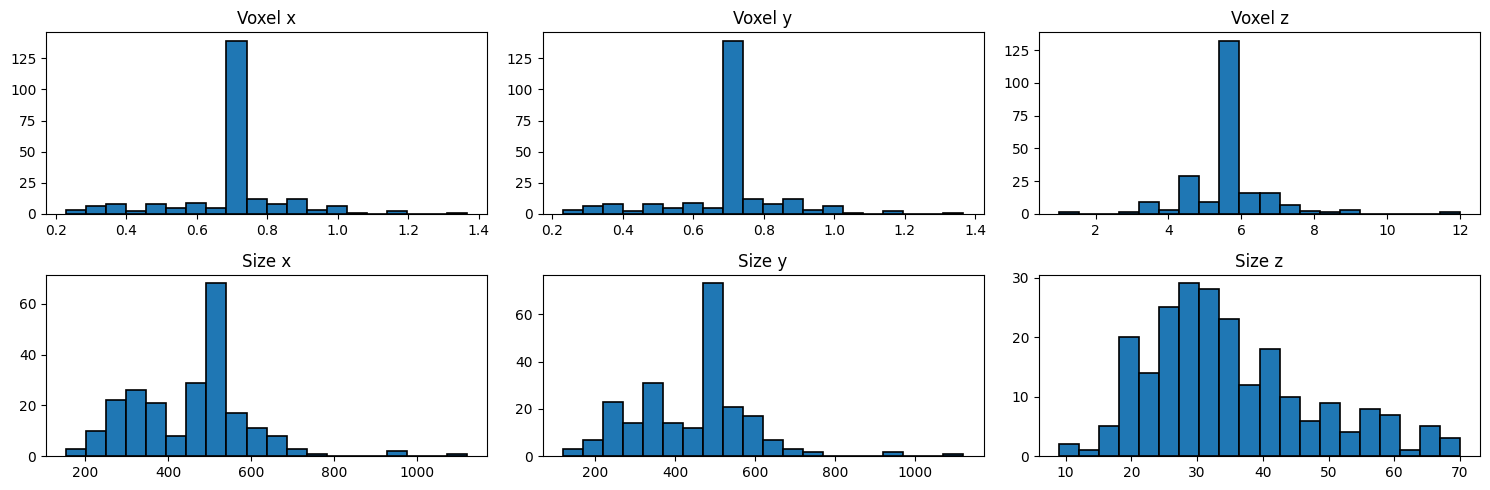

In [657]:
# Initialize lists to store voxel sizes and image dimensions for two different file paths
voxel_sizes_1 = []
image_sizes_1 = []
voxel_sizes_2 = []
image_sizes_2 = []

# Additional paths might follow a similar or different naming convention
image_name_1 = 'image.nii.gz'  # Example filename, adjust as necessary
image_name_2 = 'another_image.nii.gz'  # Second image filename

# Loop through the file indices
for i in range(1, 116):
    # Construct file paths using formatted strings
    file_path_1 = f"../WORCDatabase/Lipo/worc/Lipo-{i:03d}/" + image_name
    file_path_2 = f"../WORCDatabase/Lipo/spacing/Lipo-{i:03d}/" + image_name
    
    # Load the image files
    file_1 = nib.load(file_path_1)
    file_2 = nib.load(file_path_2)
    
    # Retrieve voxel sizes from the file headers
    voxel_sizes_1.append(file_1.header.get_zooms())
    voxel_sizes_2.append(file_2.header.get_zooms())
    
    # Get image data as a NumPy array and store its dimensions
    image_sizes_1.append(file_1.get_fdata().shape)
    image_sizes_2.append(file_2.get_fdata().shape)

# Combine data from both paths for each attribute
combined_voxel_sizes = voxel_sizes_1 + voxel_sizes_2
combined_image_sizes = image_sizes_1 + image_sizes_2

# Unzip the voxel and image sizes for easy access
voxel_x, voxel_y, voxel_z = zip(*combined_voxel_sizes)
size_x, size_y, size_z = zip(*combined_image_sizes)

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 5))

# Titles for each subplot
titles = ['Voxel x', 'Voxel y', 'Voxel z', 'Size x', 'Size y', 'Size z']

# Data to plot
data = [voxel_x, voxel_y, voxel_z, size_x, size_y, size_z]

# Plot each histogram
for ax, d, title in zip(axs.flatten(), data, titles):
    ax.hist(d, bins=20, edgecolor='black', linewidth=1.2)
    ax.set_title(title)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

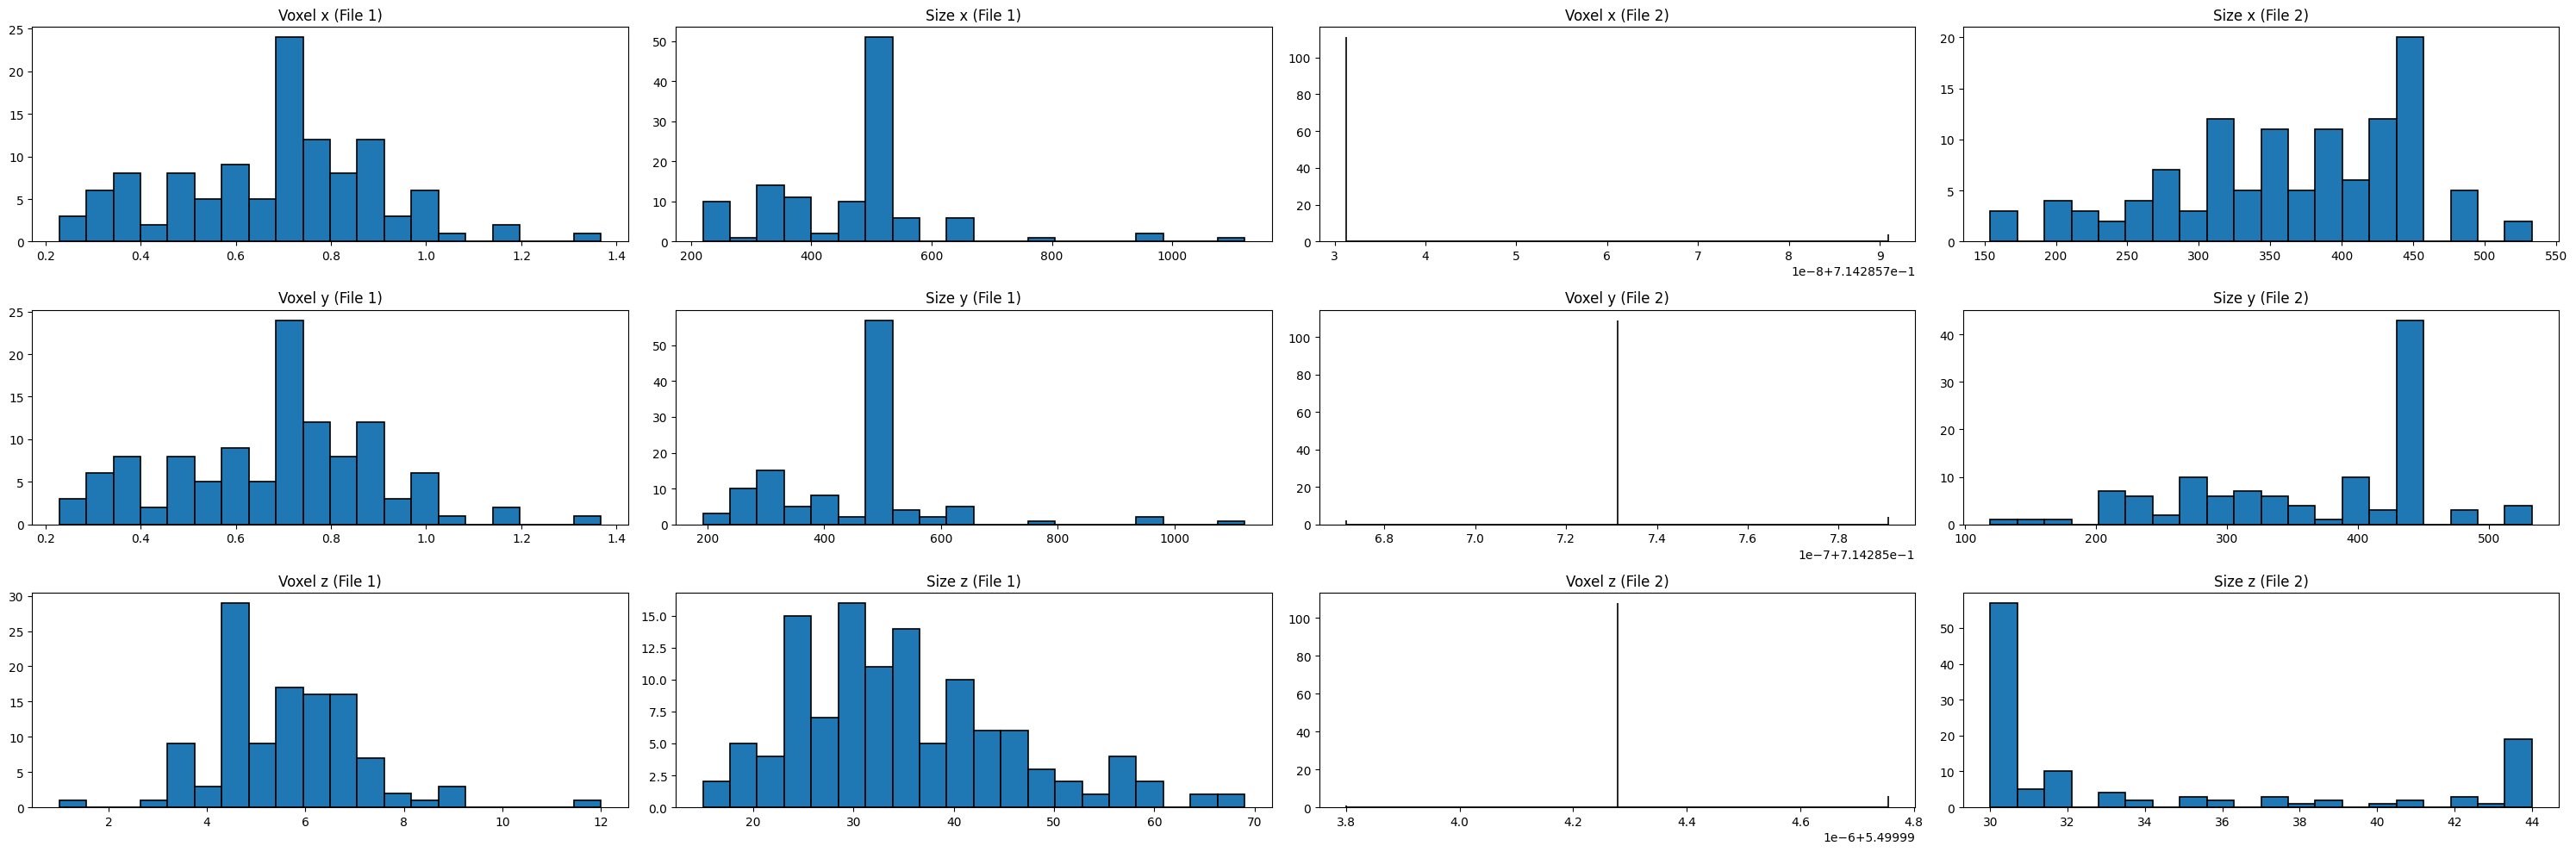

In [658]:
# Initialize lists to store voxel sizes and image dimensions from two separate file paths
voxel_sizes_1 = []
image_sizes_1 = []
voxel_sizes_2 = []
image_sizes_2 = []

# Loop through the file indices
for i in range(1, 116):
    # Construct file paths using formatted strings
    file_path_1 = f"../WORCDatabase/Lipo/worc/Lipo-{i:03d}/" + image_name
    file_path_2 = f"./trial/Lipo-{i:03d}/" + image_name
    
    # Load the image files
    file_1 = nib.load(file_path_1)
    file_2 = nib.load(file_path_2)
    
    # Retrieve voxel sizes from the file headers
    voxel_sizes_1.append(file_1.header.get_zooms())
    voxel_sizes_2.append(file_2.header.get_zooms())
    
    # Get image data as a NumPy array and store its dimensions
    image_sizes_1.append(file_1.get_fdata().shape)
    image_sizes_2.append(file_2.get_fdata().shape)

# Set up the figure for 12 subplots (2 rows x 6 columns)
fig, axs = plt.subplots(3, 4, figsize=(30, 10))  # Adjust the figsize as needed

# Titles for each subplot
titles = [
    'Voxel x (File 1)', 'Size x (File 1)','Voxel x (File 2)', 'Size x (File 2)',
    'Voxel y (File 1)', 'Size y (File 1)','Voxel y (File 2)', 'Size y (File 2)',
    'Voxel z (File 1)', 'Size z (File 1)','Voxel z (File 2)', 'Size z (File 2)'
]

# Prepare data for plotting
data = [
    [v[0] for v in voxel_sizes_1],  [s[0] for s in image_sizes_1],[v[0] for v in voxel_sizes_2], [s[0] for s in image_sizes_2],
    [v[1] for v in voxel_sizes_1], [s[1] for s in image_sizes_1], [v[1] for v in voxel_sizes_2], [s[1] for s in image_sizes_2],
    [v[2] for v in voxel_sizes_1], [s[2] for s in image_sizes_1], [v[2] for v in voxel_sizes_2], [s[2] for s in image_sizes_2]
]

# Plot each histogram
for ax, d, title in zip(axs.flatten(), data, titles):
    ax.hist(d, bins=20, edgecolor='black', linewidth=1.2)
    ax.set_title(title)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

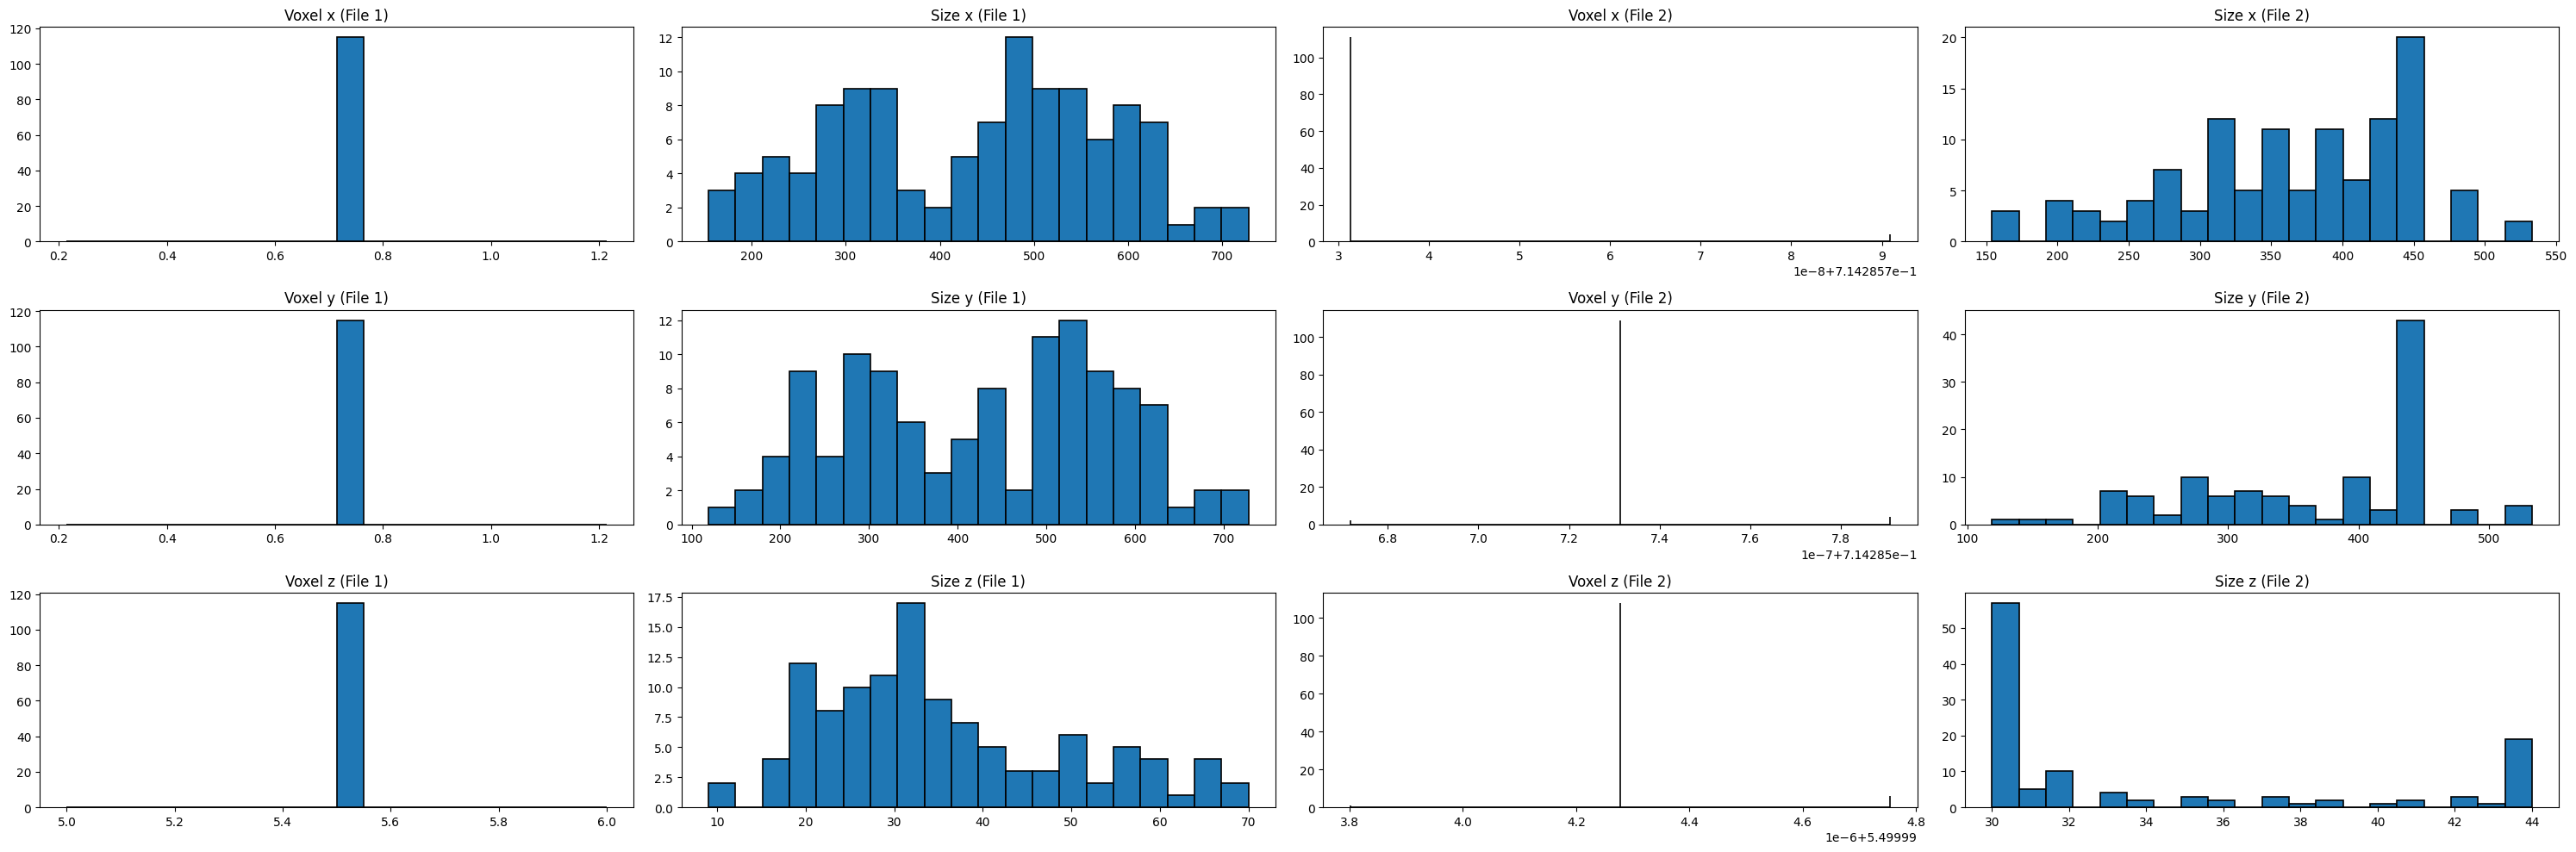

In [660]:
# Initialize lists to store voxel sizes and image dimensions from two separate file paths
voxel_sizes_1 = []
image_sizes_1 = []
voxel_sizes_2 = []
image_sizes_2 = []

# Loop through the file indices
for i in range(1, 116):
    # Construct file paths using formatted strings
    file_path_1 = f"./trial2/Lipo-{i:03d}/" + image_name
    file_path_2 = f"./trial/Lipo-{i:03d}/" + image_name
    
    # Load the image files
    file_1 = nib.load(file_path_1)
    file_2 = nib.load(file_path_2)
    
    # Retrieve voxel sizes from the file headers
    voxel_sizes_1.append(file_1.header.get_zooms())
    voxel_sizes_2.append(file_2.header.get_zooms())
    
    # Get image data as a NumPy array and store its dimensions
    image_sizes_1.append(file_1.get_fdata().shape)
    image_sizes_2.append(file_2.get_fdata().shape)

# Set up the figure for 12 subplots (2 rows x 6 columns)
fig, axs = plt.subplots(3, 4, figsize=(30, 10))  # Adjust the figsize as needed

# Titles for each subplot
titles = [
    'Voxel x (File 1)', 'Size x (File 1)','Voxel x (File 2)', 'Size x (File 2)',
    'Voxel y (File 1)', 'Size y (File 1)','Voxel y (File 2)', 'Size y (File 2)',
    'Voxel z (File 1)', 'Size z (File 1)','Voxel z (File 2)', 'Size z (File 2)'
]

# Prepare data for plotting
data = [
    [v[0] for v in voxel_sizes_1],  [s[0] for s in image_sizes_1],[v[0] for v in voxel_sizes_2], [s[0] for s in image_sizes_2],
    [v[1] for v in voxel_sizes_1], [s[1] for s in image_sizes_1], [v[1] for v in voxel_sizes_2], [s[1] for s in image_sizes_2],
    [v[2] for v in voxel_sizes_1], [s[2] for s in image_sizes_1], [v[2] for v in voxel_sizes_2], [s[2] for s in image_sizes_2]
]

# Plot each histogram
for ax, d, title in zip(axs.flatten(), data, titles):
    ax.hist(d, bins=20, edgecolor='black', linewidth=1.2)
    ax.set_title(title)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

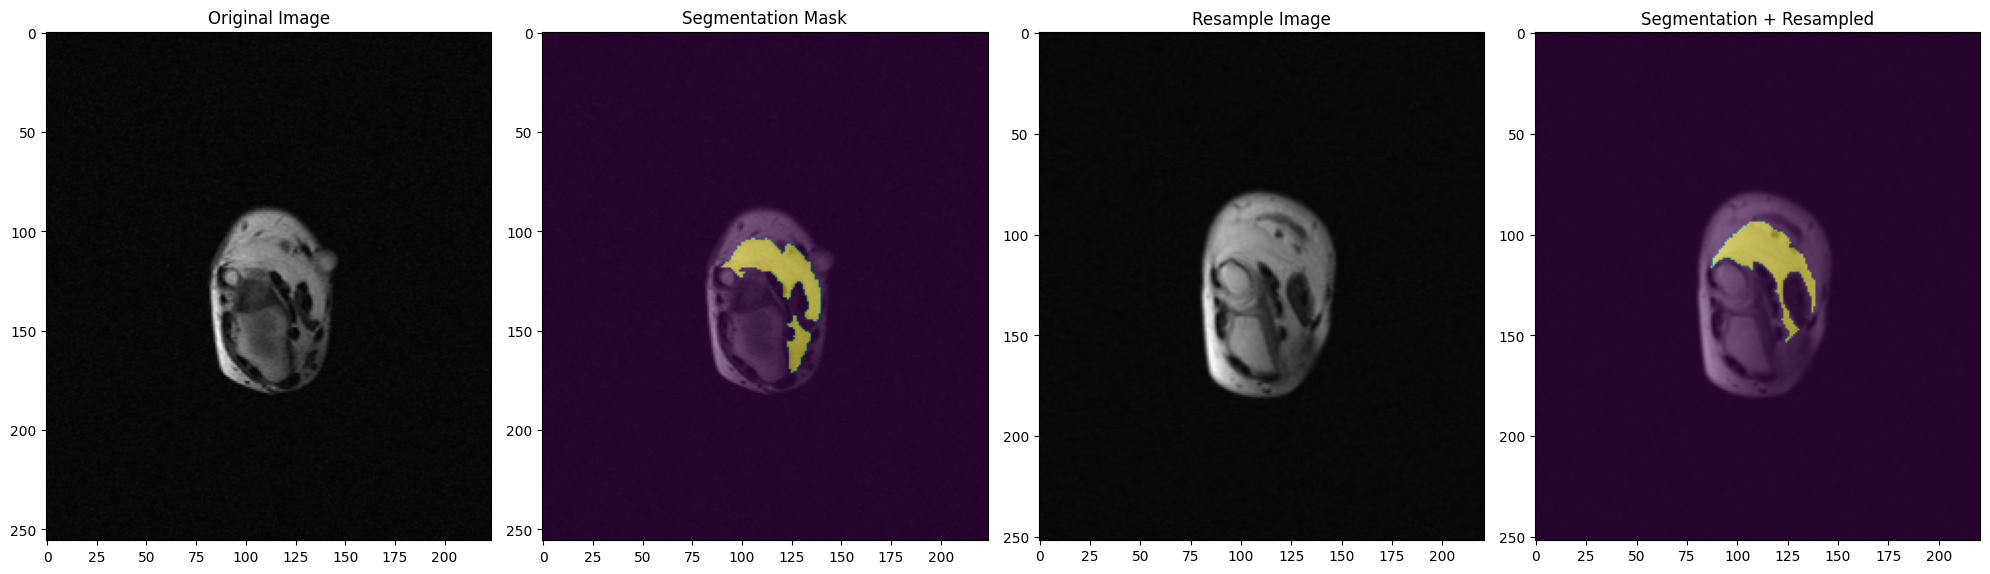

In [659]:
import matplotlib.pyplot as plt
import nibabel as nib

# Paths to the images and masks
image_paths = [
    '../WORCDatabase/Lipo/worc/Lipo-001/image.nii.gz',
    '../WORCDatabase/Lipo/spacing/Lipo-001/image.nii.gz'
]
mask_paths = [
    '../WORCDatabase/Lipo/worc/Lipo-001/segmentation.nii.gz',
    '../WORCDatabase/Lipo/spacing/Lipo-001/segmentation.nii.gz'
]

# Load the images and masks
images = [nib.load(path).get_fdata() for path in image_paths]
masks = [nib.load(path).get_fdata() for path in mask_paths]

# Indices to display specific slices
slice_indices = [2, 5]  # First for original, second for resampled

# Titles for subplots
titles = ['Original Image', 'Segmentation Mask', 'Resample Image', 'Segmentation + Resampled']

# Set up the figure
plt.figure(figsize=(20, 10))

# Loop to display each image and corresponding mask
for i in range(4):
    plt.subplot(1, 4, i + 1)
    # Determine the image and slice index based on i
    img = images[i // 2]  # Integer division to alternate between images
    msk = masks[i // 2]
    slice_idx = slice_indices[i // 2]
    
    # Show image
    plt.imshow(img[:, :, slice_idx], cmap='gray')
    
    # If index is odd, overlay the mask
    if i % 2 == 1:
        plt.imshow(msk[:, :, slice_idx], alpha=0.5, cmap='viridis')
    
    # Add title
    plt.title(titles[i])

# Show the plot
plt.tight_layout()
plt.show()
